# Topic 28 - Microbes Classification

## EDA

### Libraries and Data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.rcParams["figure.dpi"] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Structure of the dataset

Now we take a look at overall dataset structure

In [2]:
print('features:\n', df.columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

features:
 Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.

We can see that the dataset has **30527** samples and **24** features. Target will be the last column - classify each microorganism.

In [3]:
from sklearn.model_selection import train_test_split

features = df.drop(columns=['microorganisms'])
target = df['microorganisms']

x_train_val, x_test, y_train_val, y_test = train_test_split(features, target, train_size=0.8, stratify=target, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, train_size=0.8, stratify=y_train_val, random_state=42)


Lets now investigate what types given features have.  
As well as check if we have any missing/zero values.

In [4]:
print(x_train.info(), end='\n\n')
print(y_train.info(), end='\n\n')
print('missing values in features: ', (x_train.isna().any().any()))
print('missing values in target: ', (y_train.isna().any().any()))
print('zero values in features: ', (x_train==0.0).any().any())
print('zero values in target: ', (y_train==0.0).any().any())

<class 'pandas.core.frame.DataFrame'>
Index: 19536 entries, 21996 to 26274
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         19536 non-null  float64
 1   Eccentricity     19536 non-null  float64
 2   EquivDiameter    19536 non-null  float64
 3   Extrema          19536 non-null  float64
 4   FilledArea       19536 non-null  float64
 5   Extent           19536 non-null  float64
 6   Orientation      19536 non-null  float64
 7   EulerNumber      19536 non-null  float64
 8   BoundingBox1     19536 non-null  float64
 9   BoundingBox2     19536 non-null  float64
 10  BoundingBox3     19536 non-null  float64
 11  BoundingBox4     19536 non-null  float64
 12  ConvexHull1      19536 non-null  float64
 13  ConvexHull2      19536 non-null  float64
 14  ConvexHull3      19536 non-null  float64
 15  ConvexHull4      19536 non-null  float64
 16  MajorAxisLength  19536 non-null  float64
 17  MinorAxisLeng

As we can see the dataset does not have any missing points, however, it has zero values, which needs to be investigated further.

In [5]:
x_train.describe()

Solidity  Eccentricity  EquivDiameter       Extrema    FilledArea  \
count  19536.000000  19536.000000   19536.000000  19536.000000  19536.000000   
mean       9.684724     19.475353       3.627856     11.869358      0.417562   
std        4.051480      3.469683       2.214713      6.068893      0.871785   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        6.630000     17.300000       2.180000      6.760000      0.093700   
50%        9.360000     20.700000       3.370000     12.000000      0.228000   
75%       12.600000     22.200000       4.570000     17.200000      0.432000   
max       23.000000     23.000000      23.000000     23.000000     23.000000   

             Extent   Orientation   EulerNumber  BoundingBox1  BoundingBox2  \
count  19536.000000  19536.000000  19536.000000  19536.000000  19536.000000   
mean       5.847227     11.724373     22.381045     10.922155     10.369667   
std        3.240655      6.609031      0.972343      6.113965      5.792505   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.310000      5.910000     22.300000      5.690000      5.710000   
50%        5.270000     12.100000     22.600000     10.900000     10.000000   
75%        7.870000     17.200000     22.900000     15.800000     14.900000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

       ...   ConvexHull3   ConvexHull4  MajorAxisLength  MinorAxisLength  \
count  ...  19536.000000  19536.000000     19536.000000     19536.000000   
mean   ...     11.051122     11.026235         1.607533         1.015712   
std    ...      6.112046      6.110457         1.699920         1.268348   
min    ...      0.000000      0.000000         0.000000         0.000000   
25%    ...      5.760000      5.745000         0.635000         0.421000   
50%    ...     11.000000     11.000000         1.150000         0.743000   
75%    ...     15.900000     15.900000         2.050000         1.210000   
max    ...     23.000000     23.000000        23.000000        23.000000   

          Perimeter    ConvexArea     Centroid1     Centroid2          Area  \
count  19536.000000  19536.000000  19536.000000  19536.000000  19536.000000   
mean       0.829442      0.259997     11.753951     11.524800      0.801763   
std        1.173987      1.042430      6.048938      5.688628      1.180746   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.253000      0.035000      6.560000      7.100000      0.218000   
50%        0.512000      0.085200     12.000000     11.100000      0.510000   
75%        0.960000      0.196000     16.900000     16.100000      0.929000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

              raddi  
count  19536.000000  
mean       5.206181  
std        2.797916  
min        0.000000  
25%        3.010000  
50%        5.320000  
75%        7.050000  
max       23.000000  

[8 rows x 24 columns]

Each feature has a minimal value of 0.0 and maximal value of 23.0, that can indicate that some preprocessing of the data was already done.

In [6]:
print('number of zero values overall: ', (x_train == 0.0).any(axis=1).sum())

number of zero values overall:  166


As 158 samples is not big quantity, comparing to the number of samples in data set, and as from description of the data set we don't know what kind of preprocessing was done, we decide to keep rows, containing zeros.

### Duplicates

We need to see if we have any duplicates in samples.

In [7]:
print(x_train.join(y_train).duplicated().value_counts(), end='\n\n')

True     14875
False     4661
Name: count, dtype: int64



This shows that we have only 4661 original data points, everything else are duplicates. To work with duplicates correctly, we need to delete them from initial data set and only then separate into test, validation and test sets. Then establish and train separate models for sets without duplicates. Due to time issue we will do it correctly later. For now we will ignore duplicates and work with previously separated data.

### Distribution of classes

Lets investigate given classes in a more precise manner.

number of classes:  10


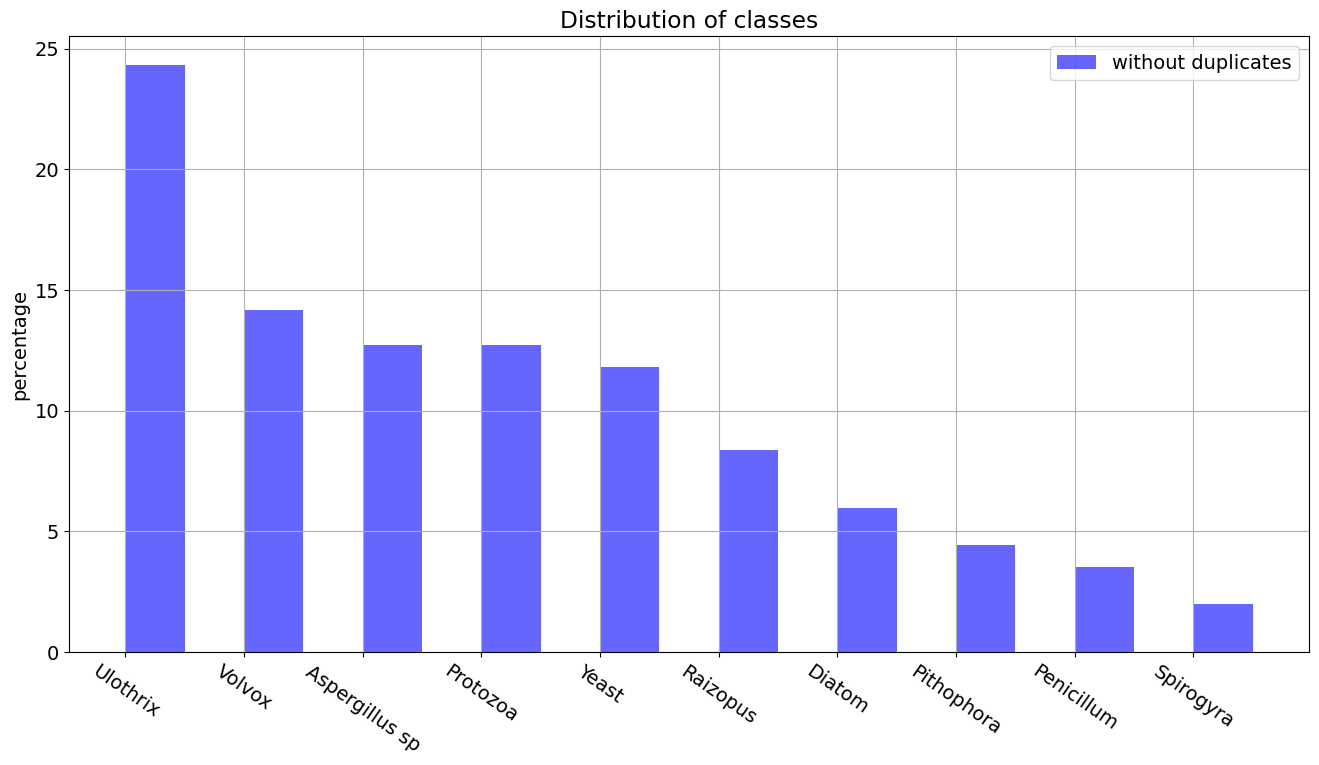

In [47]:
class_distribution = y_train.value_counts(normalize=True)*100

print('number of classes: ', len(class_distribution))

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.5
bars = ax.bar(indices, class_distribution, bar_width, label='without duplicates', color='blue', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices - bar_width / 2)
ax.set_xticklabels(class_distribution.index)

plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

We can observe that dataset is **highly** imbalanced, that is the reason to use stratify method in train_test_split.

### Boxplots and outliers

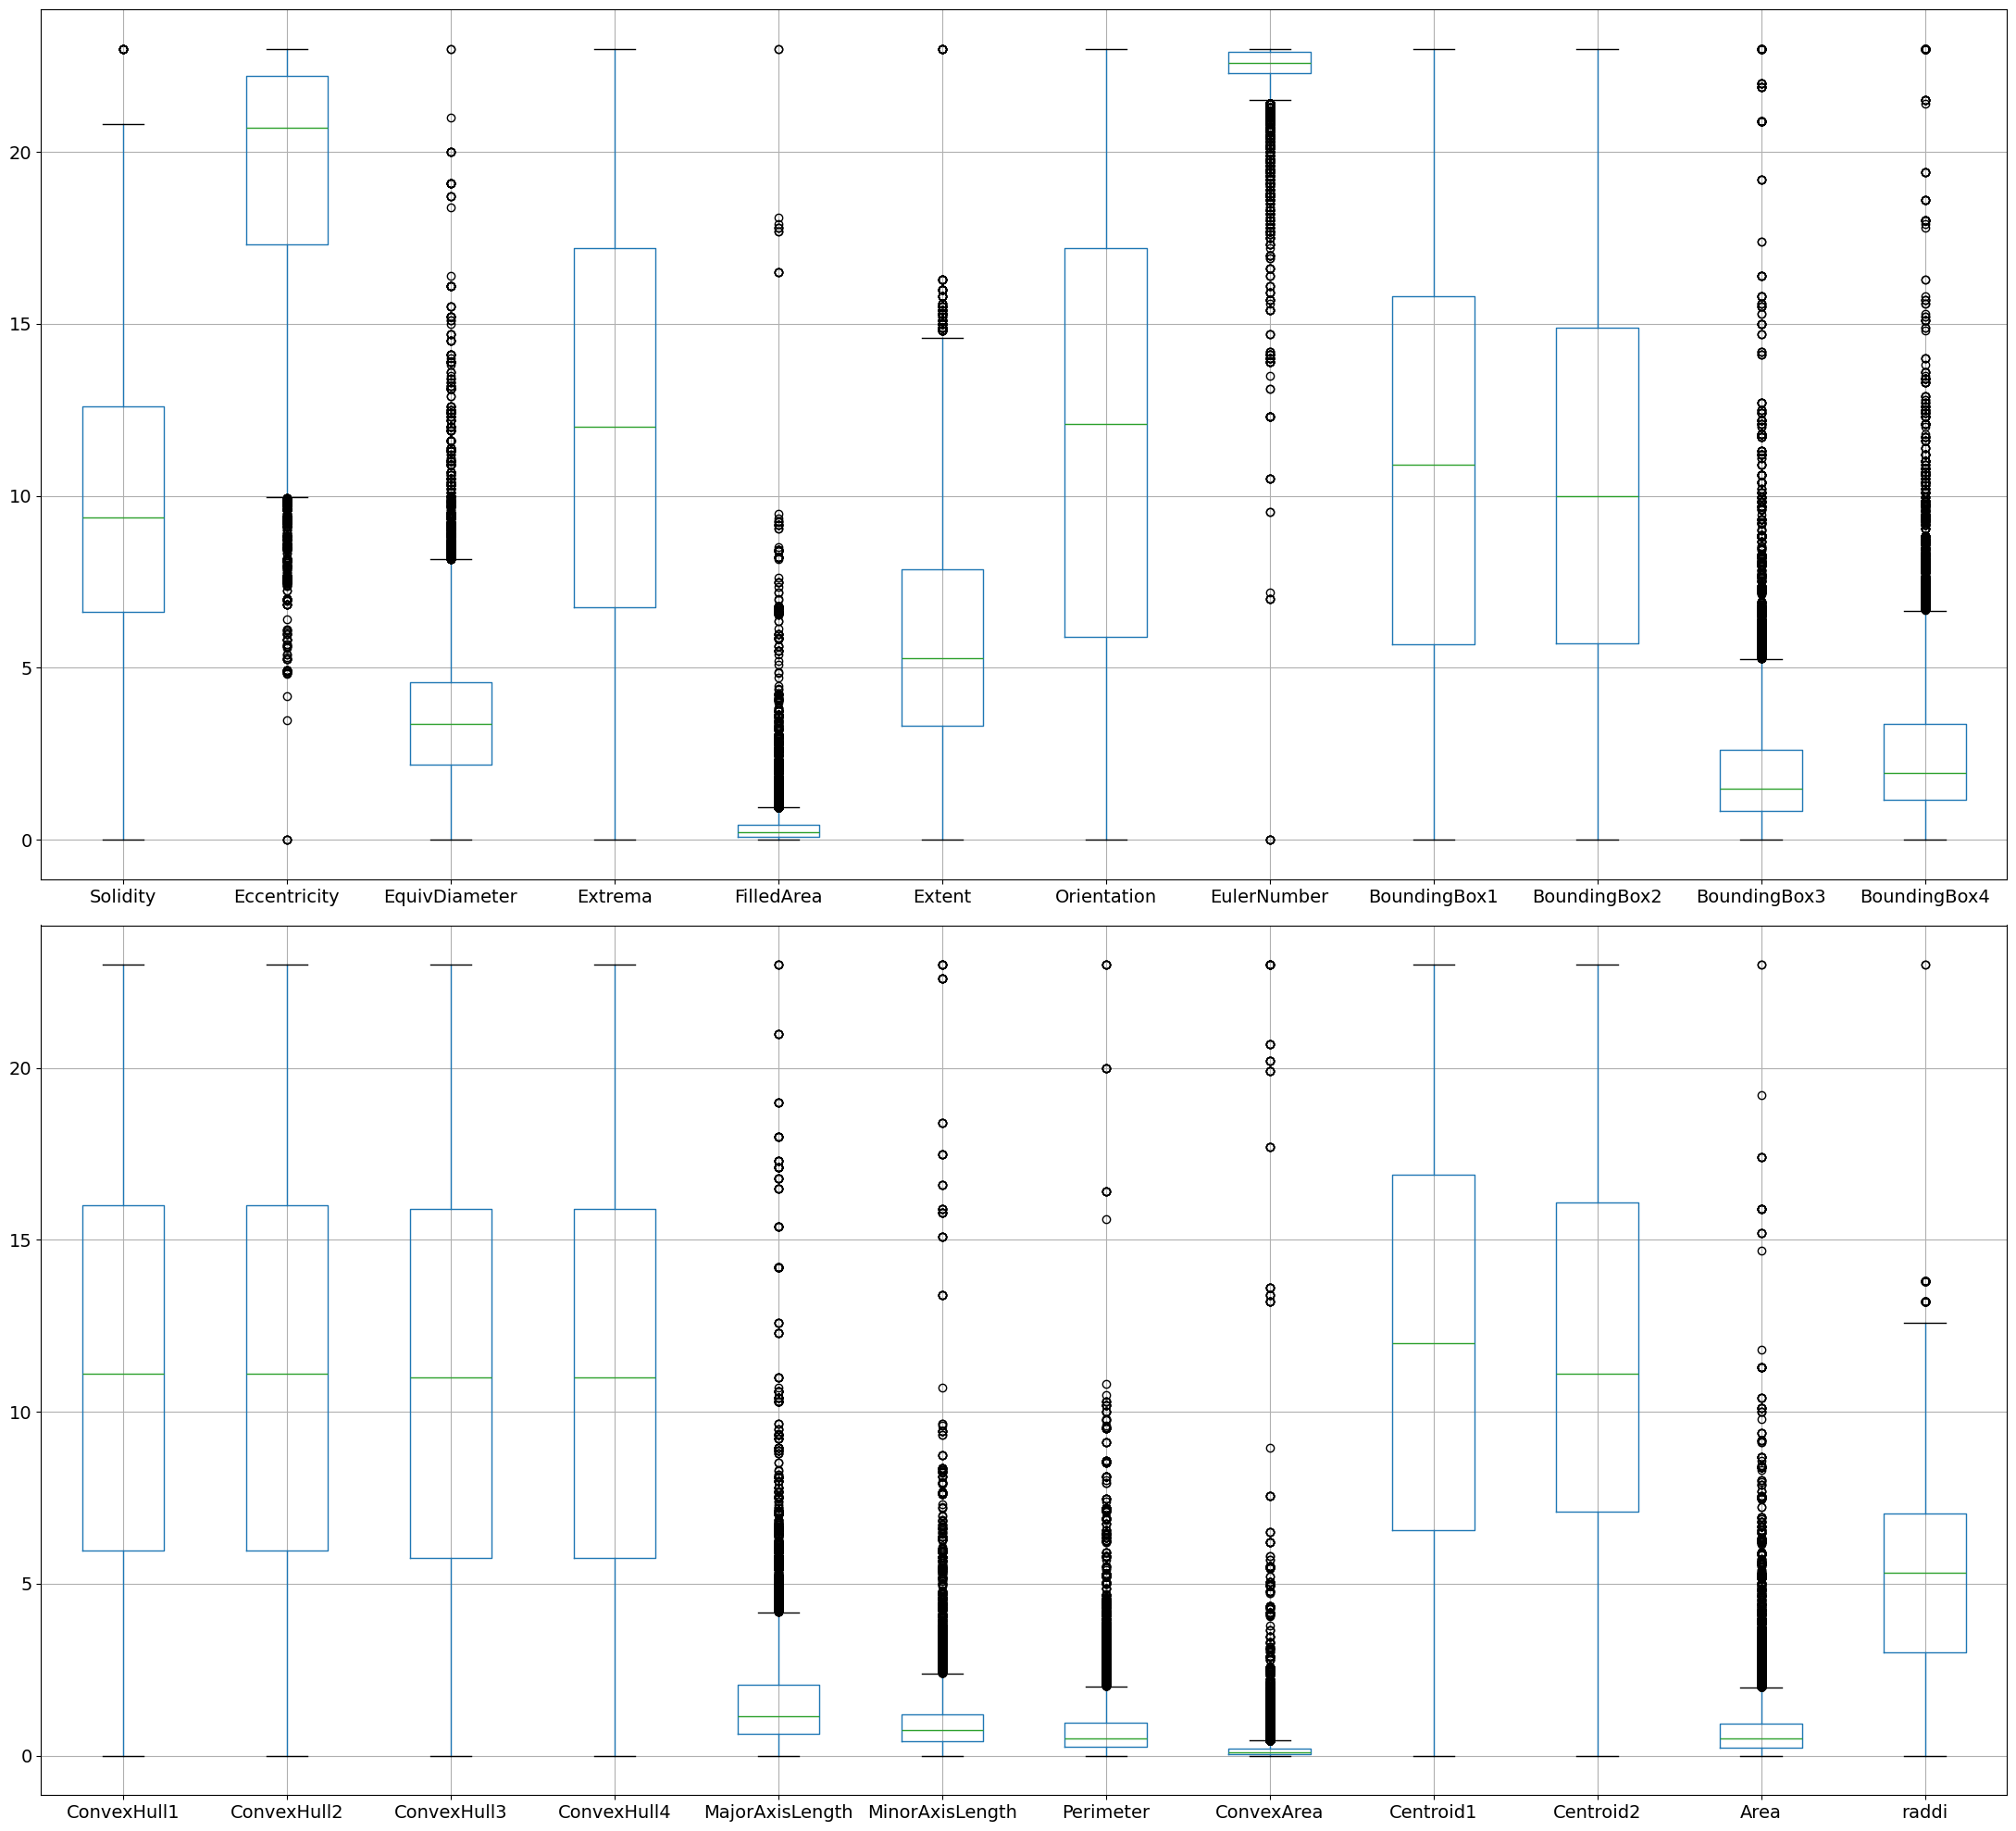

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
x_train.boxplot(ax=ax1, column=list(x_train.columns)[:12], fontsize=14)
x_train.boxplot(ax=ax2, column=list(x_train.columns)[12:], fontsize=14)
plt.tight_layout()

From the boxplots above we can clearly see that the dataset contains a lot of extreme outliers. There are different ways to calculate outliers, namely using quantiles and standard deviation.

Firstly we calculate number of outliers using quantiles.

In [10]:
q25 = x_train.quantile(q=0.25)
q50 = x_train.quantile(q=0.50)
q75 = x_train.quantile(q=0.75)
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

In [11]:
iqr_outliers = x_train[(x_train < lower_bound) | (x_train > upper_bound)].any(axis=1)

print('Number of outliers using IQR:', iqr_outliers.sum().max())

Number of outliers using IQR: 3597


Secondly we find outliers using standard deviation.

In [12]:
std = x_train.std(axis=0)
mean = x_train.mean(axis=0)
outliers = (abs(x_train - mean) > (3 * std))

print('Number of outliers using std:', outliers.sum().max())

Number of outliers using std: 368


We see that the number of outliers, calculated using IQR is 10 times bigger, using std. Then we will work with outliers using different transformators and comparing there influence on models.

### Distribution of features

<Figure size 2200x2000 with 0 Axes>

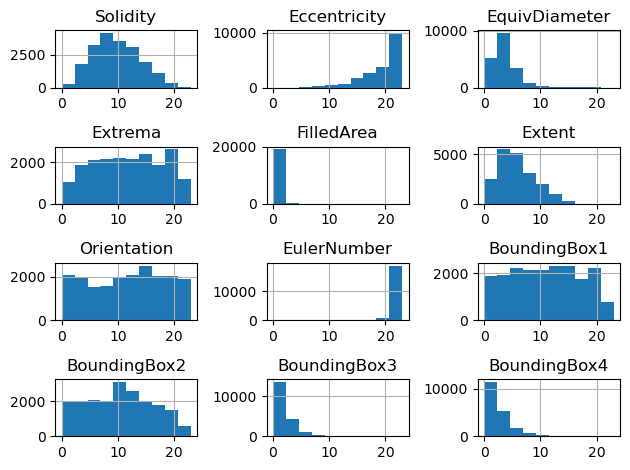

In [13]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[:12]].hist()
plt.tight_layout()

<Figure size 2200x2000 with 0 Axes>

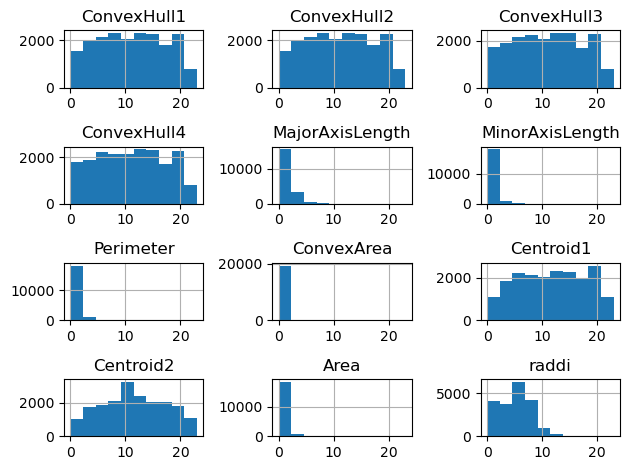

In [14]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[12:]].hist()
plt.tight_layout()

We notice that the distribution of features is rarely standard, as well, some parameters take smaller values, then others. During modelling we will try a few transformers.

### Corellation matrix

<Axes: >

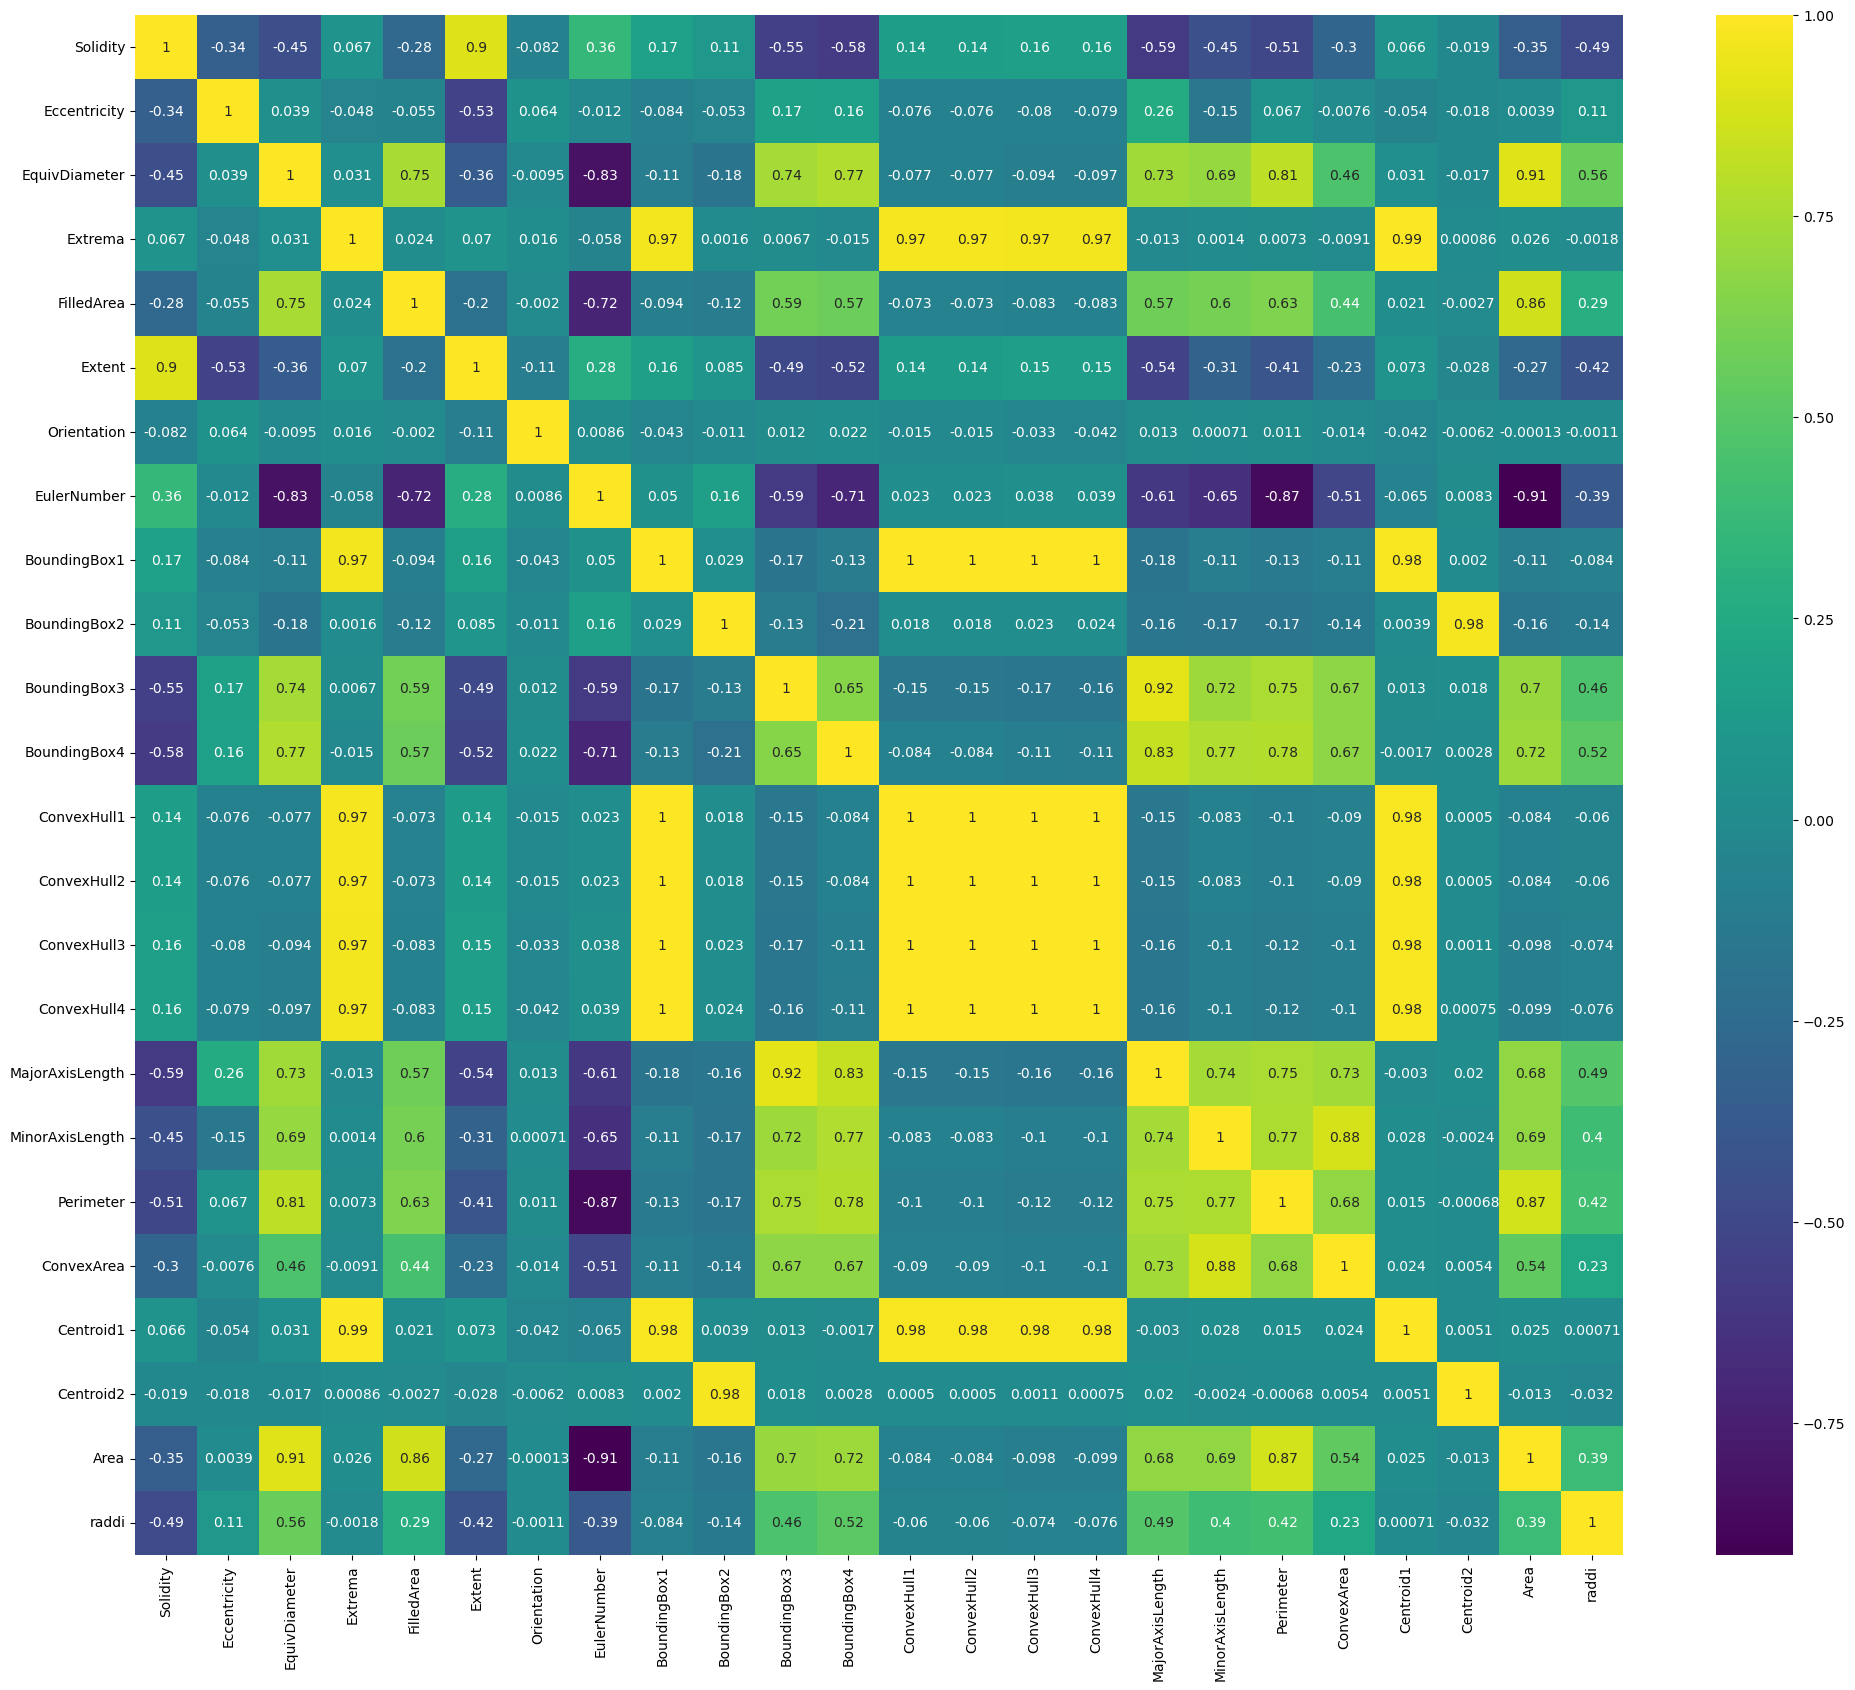

In [15]:
matrix = x_train.corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)

Having correlation coef equal to 1 and approximately equal to 1 is suspicuos, so we will look at these columns closer.

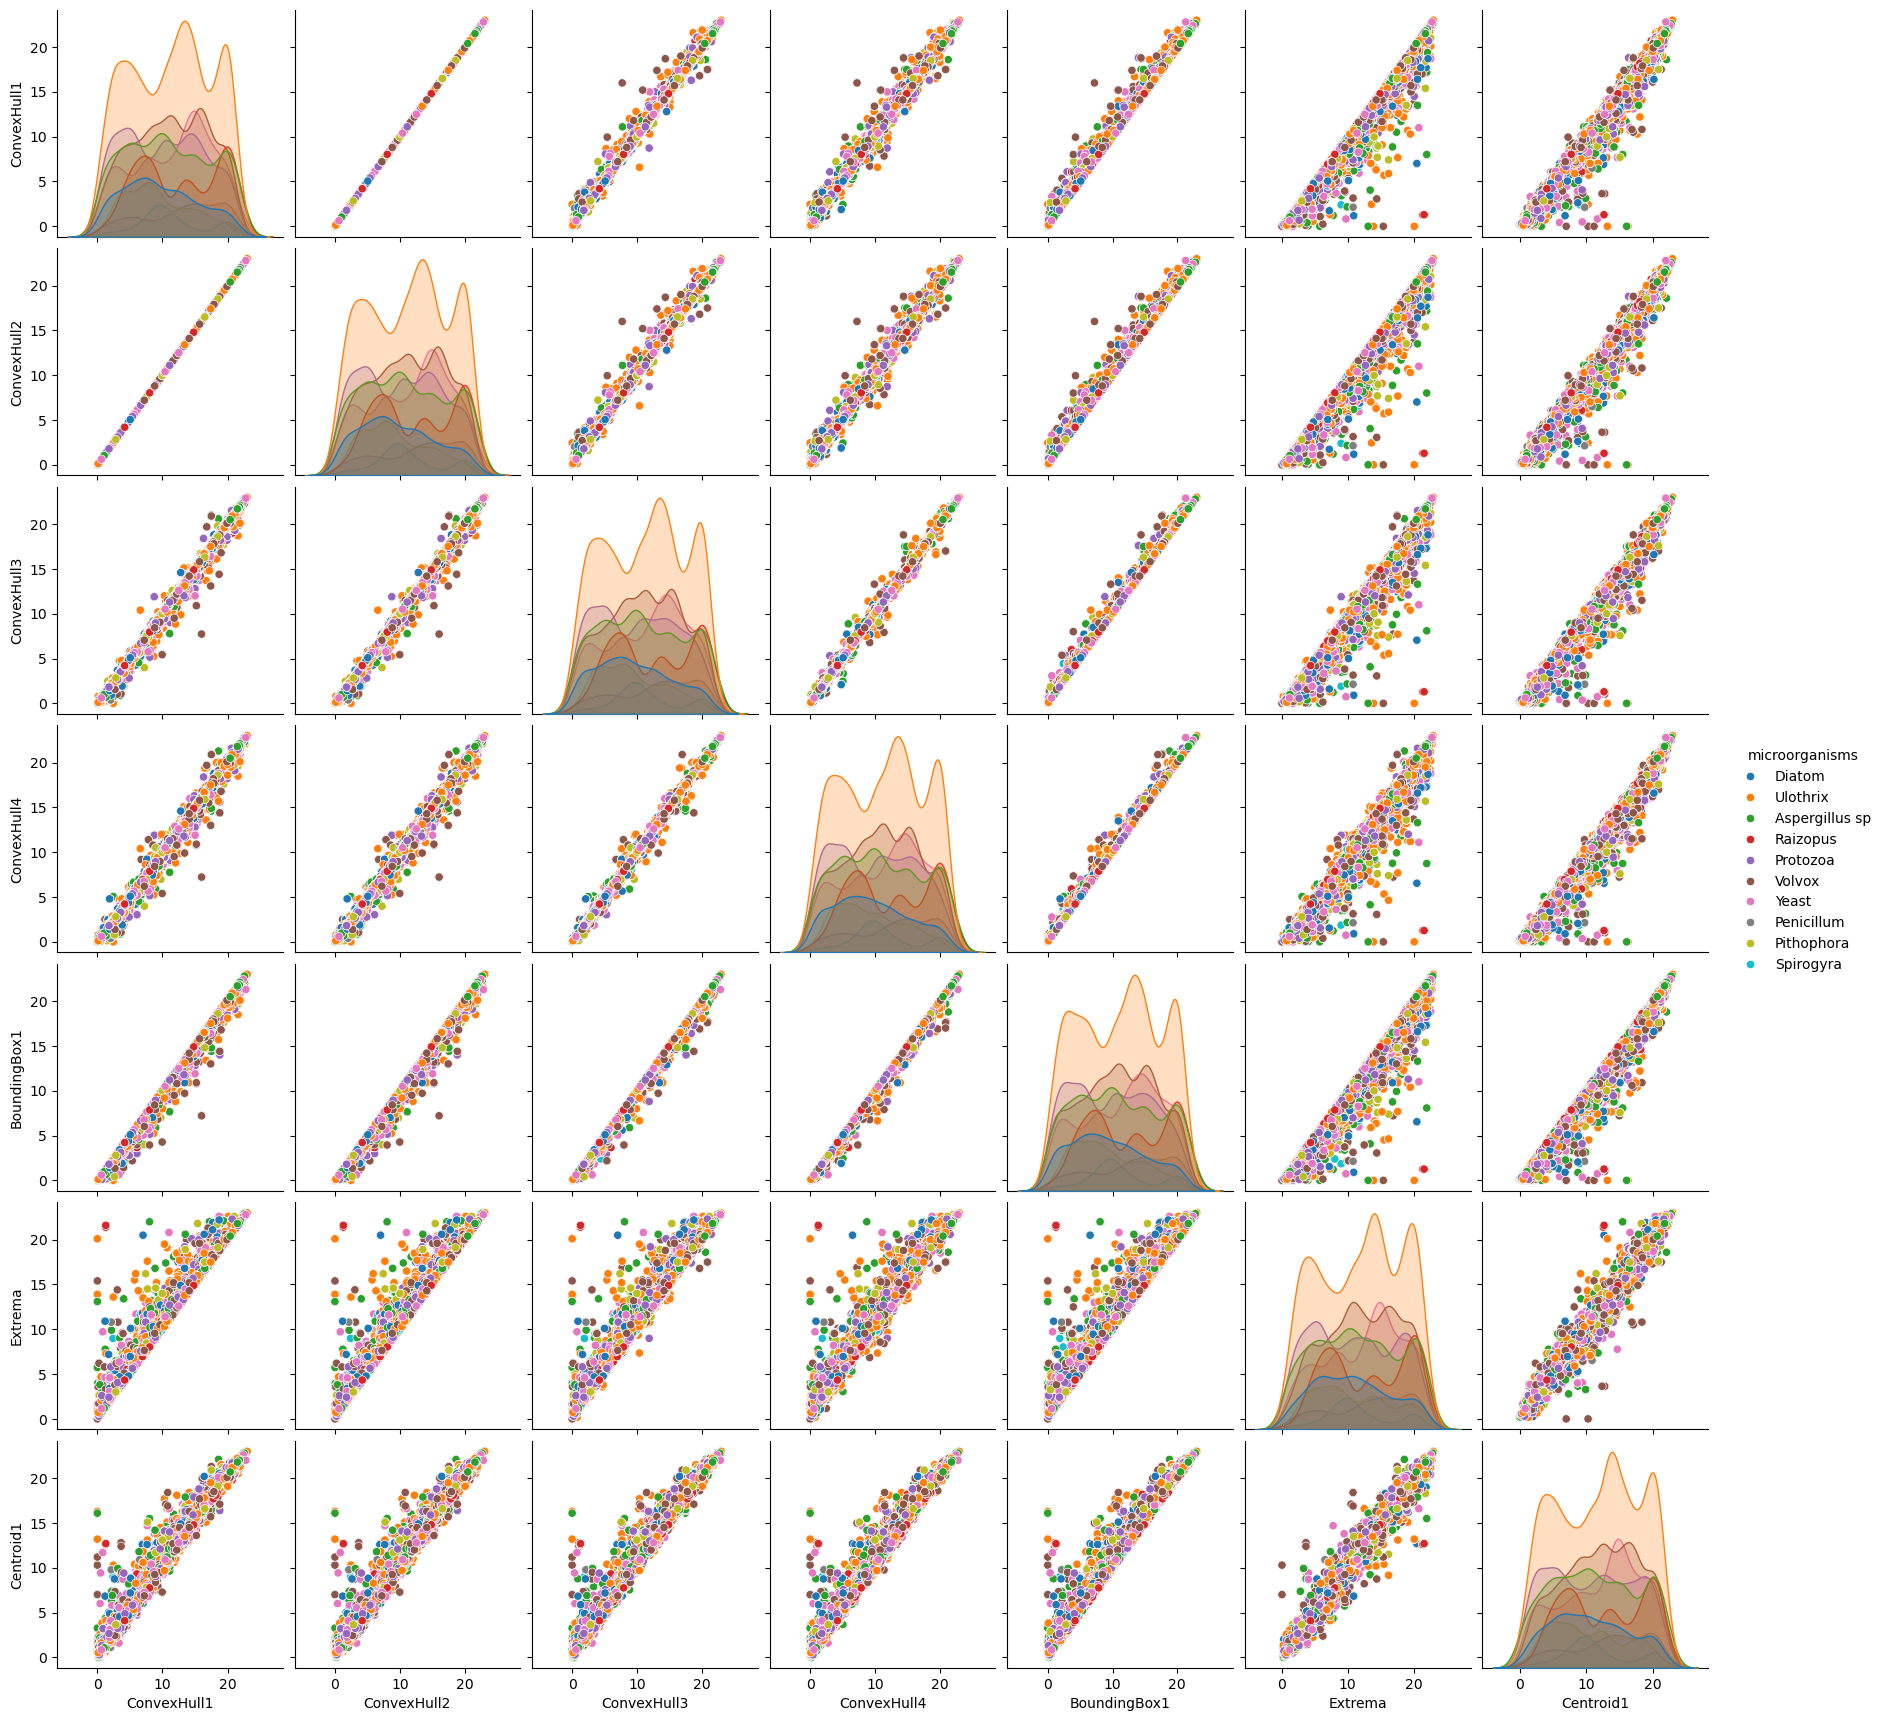

In [16]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'BoundingBox1', 'Extrema', 'Centroid1']],
        hue='microorganisms',
        )
plt.show()

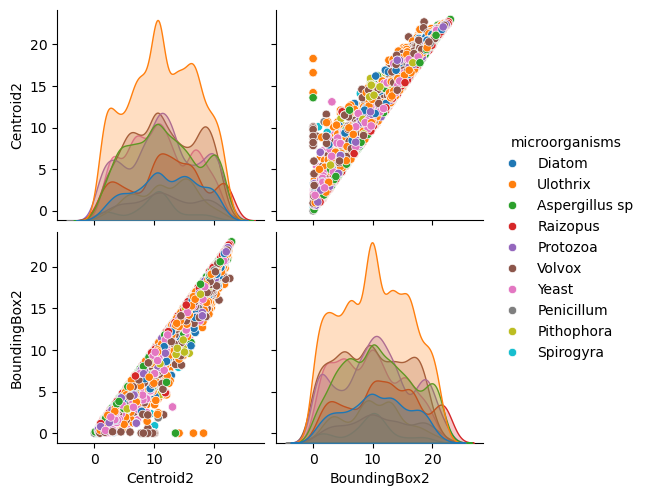

In [17]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['Centroid2', 'BoundingBox2', ]],
        hue='microorganisms',
        )
plt.show()

The linear dependence for all selected features is obvious, but the most strange dependence is between ConvexHull1 and ConvexHull2, so we want to compare these columns.

In [18]:
convex_hull_array = np.array(df[['ConvexHull1', 'ConvexHull2']])
print(np.sum(np.diff(convex_hull_array)))

0.0


As the difference between the entries of the ConvexHull1 and ConvexHull2 is equal to 0, we conclude that ConvexHull1=ConvexHull2 and delete this feature from data set (train and test data).

In [19]:
x_train.drop(columns='ConvexHull2', inplace=True)
x_val.drop(columns='ConvexHull2', inplace=True)
x_test.drop(columns='ConvexHull2', inplace=True)

train_df.drop(columns='ConvexHull2', inplace=True)

We will keep other features despite the fact there exists a linear correlation between them. As our problem is classification, not regression (if we would like to determine value of some params), this correlation chouldn't influence our classification.

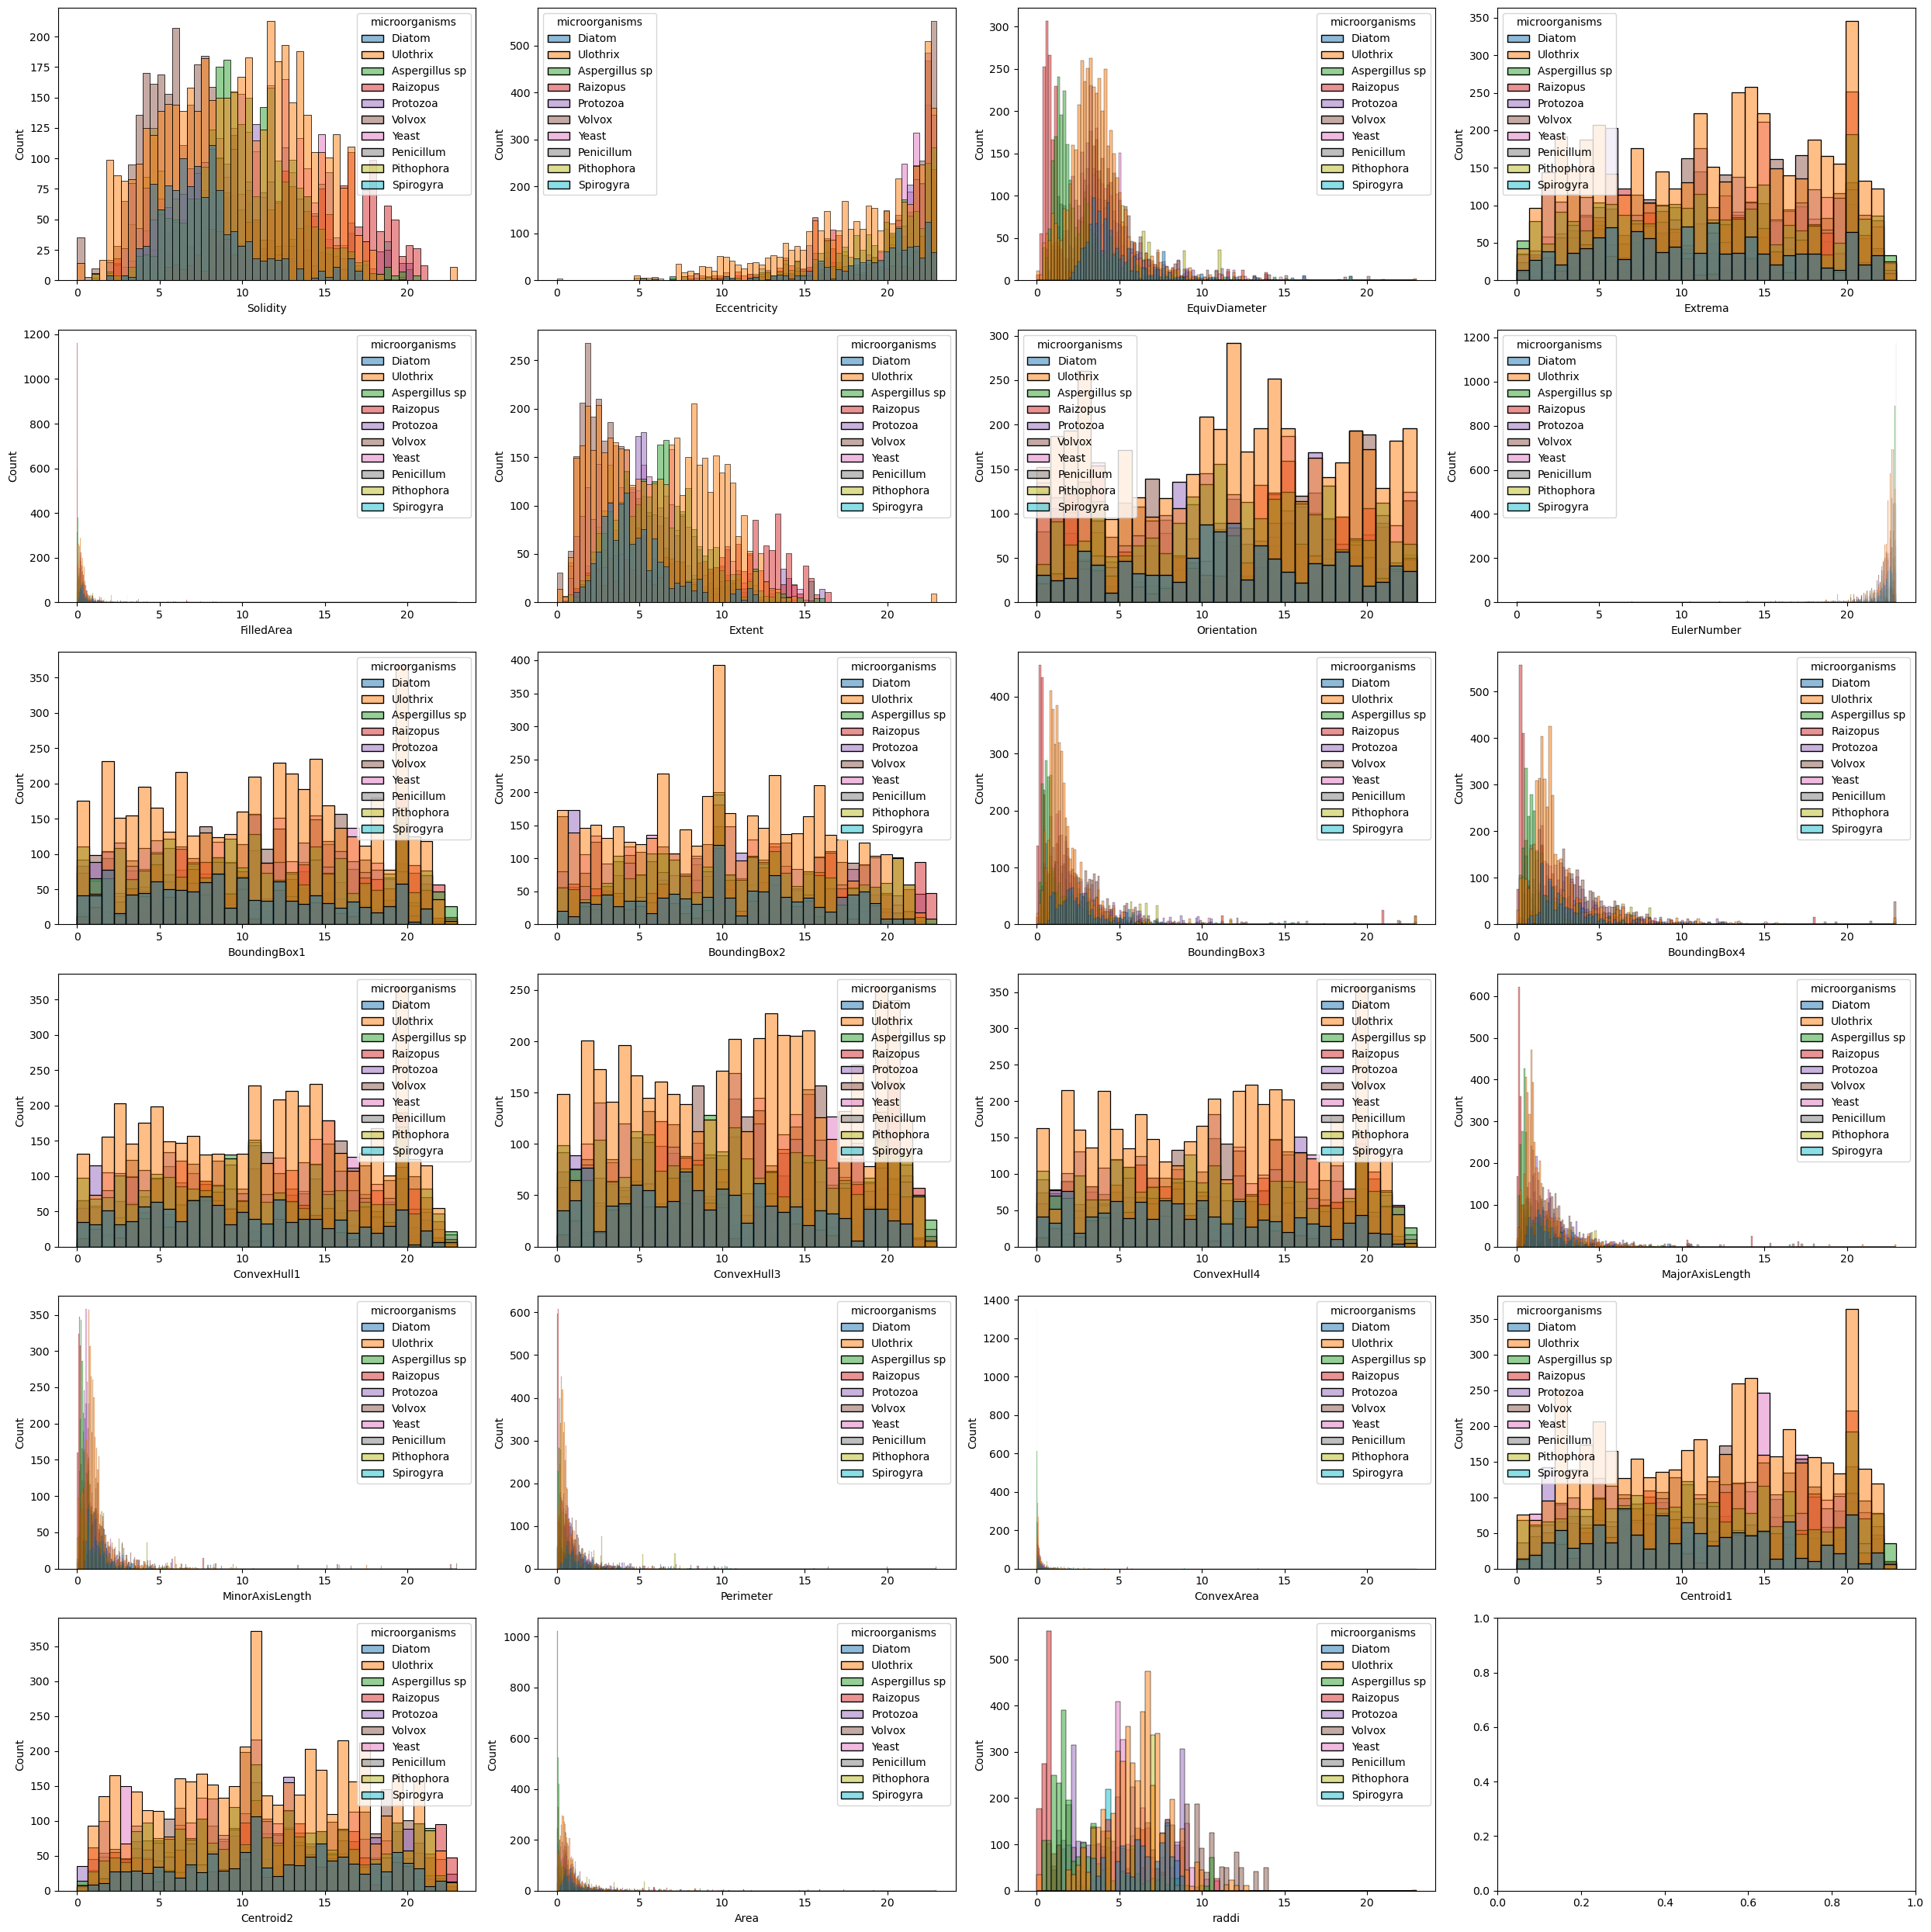

In [20]:
fig, ax = plt.subplots(6, 4, figsize=(25, 25))

for name, a in zip(train_df.columns[:-1], ax.ravel()):
  sns.histplot(data=train_df, x=name, hue="microorganisms", ax=a)

plt.tight_layout()
plt.show()

### Conclusion of EDA

We acknowledge the following problems:
1. The data set is highly imbalanced with the smallest class containing roughly 2% of data. However despite this fact we don't want to simplify the problem to binary classification or to classification of 2-3 biggest classes and will stick to multiclass classification of all given classes.
2. The data set contains outliers and is not standardised. For some classifiers (for example KNN oк Logistic Regression) it is crucial for features to be in a specific range. Thus, we will use different transformers to shift and scale each feature in a suitable way.
3. The data set contains a huge amount of duplicates. However deleting them influences the distribution of the data among classes, so we don't decide to delete duplicates in advance and will study the behaviour of models with/without duplicates. 
4. The data set contains several columns with linear dependence. This issue as well will be a subject of study during modelling.
   
Model performance evaluation:  

As it states in the dataset description, the correct classification of given microorganism is crucial. Thus we assume that all classes have the same worth. Therefore, the most valuable metric for model evaluation shall be **Recall**, however, to gain a full picture of model performance we will also use **Cohen's Kappa** as it fits good with the imbalanced classification. We prefer to use **Macro Recall** as for us every class is important, despite it's weight. It is also worth using confusion matrix to gain additional information of model performance.

### Data transformation

As data contains outliers and features take different range of values we will transform data before modelling. 
According to userguide (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) we would like to compare the following transformers:
1. StandardScaler. According to userguide cannot guarantee balanced feature scales in the presence of outliers. We want to use it to compare what is 'good'/'bad' result for our data set.
2. MinMaxScaler. Min and max values we will calculate depending on mean and std for each feature, s.t. min = mean - 3std, max = mean + 3std.
3. RobustScaler. The centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.
4. PowerTransformer. Applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. The optimal scaling factor is determined via maximum likelihood estimation. Has 2 variations: Yeo-Johnson and Box-Cox. Box-Cox can only be applied to strictly positive data, that is not suitable for our case because of 0 values. So we will apply Yeo-Johnson method.
5. QuantileTransformer (uniform output). Applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. All the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.
6. QuantileTransformer (Gaussian output). 
7. Normalizer. Rescales the vector for each sample to have unit norm, independently of the distribution of the samples.

## Modelling

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In this section we will try each models with default parameters and then will tune them.

### kNeighborsClassifier

For better comparison of results we will save them into a dataframe. 

In [22]:
columns = [
    'Scaler',
    'Sampler',
    'Weights',
    'Number of neighbors',
    'Macro recall train',
    'Macro recall validation',
    'Macro f1 validation',
    'Cohens Kappa validation',
    'Accuracy validation',
    ]
kNN_scores = pd.DataFrame(columns=columns)

Default model:

In [23]:
neigh = KNeighborsClassifier(
    n_neighbors=5, #default parameter
    n_jobs=-1
    ) 
neigh.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'Weights': 'uniform',
    'Number of neighbors': 5,
    'Macro recall train': recall_score(y_train, neigh.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, neigh.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, neigh.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, neigh.predict(x_val)),
    'Accuracy validation': neigh.score(x_val, y_val),
}
kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_9612\2799279124.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)


Scaler Sampler  Weights Number of neighbors  Macro recall train  \
0   None    None  uniform                   5            0.920809   

   Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
0                  0.87972             0.881305                 0.881878   

   Accuracy validation  
0              0.89826

Next we will tune model.

Initialize scoring parameters for GridSearchCV and RandomizedSearchCV.

In [24]:
def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

Naive search for hyperparameter number of neighbors for kNN.

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

kNN = KNeighborsClassifier(n_jobs=-1)

param_search = {
    'n_neighbors': np.arange(1, 21, 1),
    }
    
gridsearch = GridSearchCV(
    kNN,
    param_grid=param_search,
    scoring=scoring,
    n_jobs=-1,
    refit='recall_macro',
    cv=skf,
    )

gridsearch.fit(x_train, y_train)

print('Best Parameters:', gridsearch.best_params_)
print('Best macro Recall score:', gridsearch.best_score_)

print()

best_knn = gridsearch.best_estimator_

new_row = {
    'Scaler': None,
    'Sampler': None,
    'Weights': 'uniform',
    'Number of neighbors': gridsearch.best_params_['n_neighbors'],
    'Macro recall train': recall_score(y_train, best_knn.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, best_knn.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, best_knn.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, best_knn.predict(x_val)),
    'Accuracy validation': best_knn.score(x_val, y_val),
}

kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

Best Parameters: {'n_neighbors': 1}
Best macro Recall score: 0.9446711992964142



Scaler Sampler  Weights Number of neighbors  Macro recall train  \
0   None    None  uniform                   5            0.920809   
1   None    None  uniform                   1            1.000000   

   Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
0                 0.879720             0.881305                 0.881878   
1                 0.957682             0.963505                 0.972153   

   Accuracy validation  
0             0.898260  
1             0.976049

Best parameter n_neighbors = 1 indicates overestimation of a model, despite the fact that metrics on validation set show good results, so we will calculate and plot metrics for different values of this hyperparameter.

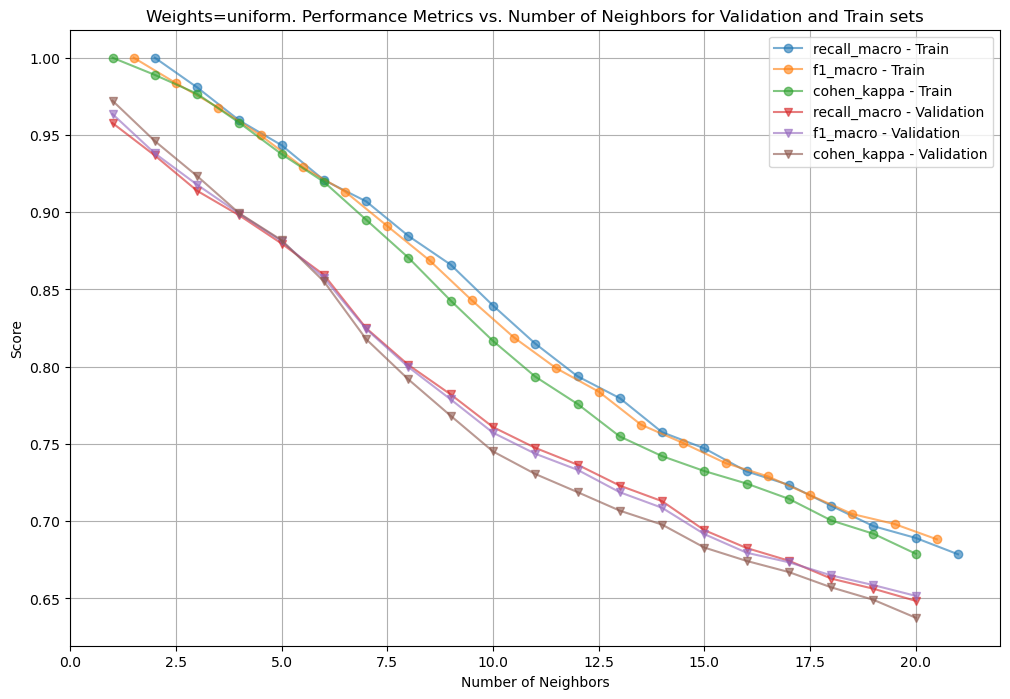

In [26]:
k_values = np.arange(1, 21)

metrics = {
    'Train': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Validation': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    
    metrics['Train']['recall_macro'].append(recall_score(y_train, knn.predict(x_train), average='macro'))
    metrics['Train']['f1_macro'].append(f1_score(y_train, knn.predict(x_train), average='macro'))
    metrics['Train']['cohen_kappa'].append(cohen_kappa_score(y_train, knn.predict(x_train)))

    metrics['Validation']['recall_macro'].append(recall_score(y_val, knn.predict(x_val), average='macro'))
    metrics['Validation']['f1_macro'].append(f1_score(y_val, knn.predict(x_val), average='macro'))
    metrics['Validation']['cohen_kappa'].append(cohen_kappa_score(y_val, knn.predict(x_val)))


plt.figure(figsize=(12, 8))
markers = {'Train': 'o', 'Validation': 'v', }
offset = {
    'Train': {'recall_macro': 1, 'f1_macro': 0.5, 'cohen_kappa': 0},
    'Validation': {'recall_macro': 0, 'f1_macro': 0, 'cohen_kappa': 0},
}

for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            k_values + offset[set][metric_name],
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )

plt.title('Weights=uniform. Performance Metrics vs. Number of Neighbors for Validation and Train sets')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

We see that all metrics decrease significantly as we increase number of neighbors.

We try to tune kNN changing the parameter weights to distance from default uniform.

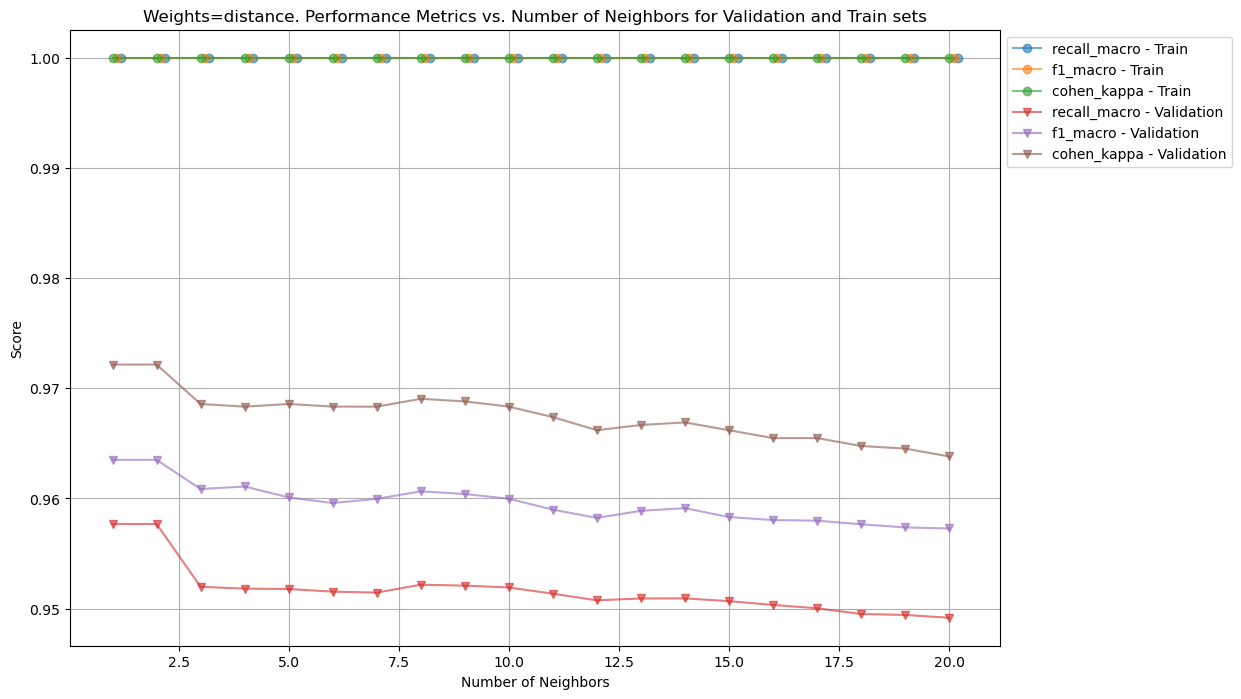

In [31]:
k_values = np.arange(1, 21)

metrics = {
    'Train': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Validation': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)
    
    metrics['Train']['recall_macro'].append(recall_score(y_train, knn.predict(x_train), average='macro'))
    metrics['Train']['f1_macro'].append(f1_score(y_train, knn.predict(x_train), average='macro'))
    metrics['Train']['cohen_kappa'].append(cohen_kappa_score(y_train, knn.predict(x_train)))

    metrics['Validation']['recall_macro'].append(recall_score(y_val, knn.predict(x_val), average='macro'))
    metrics['Validation']['f1_macro'].append(f1_score(y_val, knn.predict(x_val), average='macro'))
    metrics['Validation']['cohen_kappa'].append(cohen_kappa_score(y_val, knn.predict(x_val)))


plt.figure(figsize=(12, 8))
markers = {'Train': 'o', 'Validation': 'v', }
offset = {
    'Train': {'recall_macro': 0.2, 'f1_macro': 0.1, 'cohen_kappa': 0},
    'Validation': {'recall_macro': 0, 'f1_macro': 0, 'cohen_kappa': 0},
}

for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            k_values + offset[set][metric_name],
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )

plt.title('Weights=distance. Performance Metrics vs. Number of Neighbors for Validation and Train sets')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

We see that just changing of weights from uniform to distance highly improves the model. Increasing a number of Neighbors doesn't decrease scores that much anymore. 

In [32]:
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1)
neigh.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'Weights': 'distance',
    'Number of neighbors': 2,
    'Macro recall train': recall_score(y_train, neigh.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, neigh.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, neigh.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, neigh.predict(x_val)),
    'Accuracy validation': neigh.score(x_val, y_val),
}

kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

Scaler Sampler   Weights Number of neighbors  Macro recall train  \
0   None    None   uniform                   5            0.920809   
1   None    None   uniform                   1            1.000000   
2   None    None  distance                   2            1.000000   

   Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
0                 0.879720             0.881305                 0.881878   
1                 0.957682             0.963505                 0.972153   
2                 0.957682             0.963505                 0.972153   

   Accuracy validation  
0             0.898260  
1             0.976049  
2             0.976049

We try a few data transformers to see if data transformation impacts on model performance.
For data transformers we chosed:
1. StandardScaler.
2. RobustScaler.
3. QuantileTransformer.
Choice of RobustScaler and QuantileTransformer is made with help of sklearn guideline, that concludes that these two scalers perform the best with the outliers.

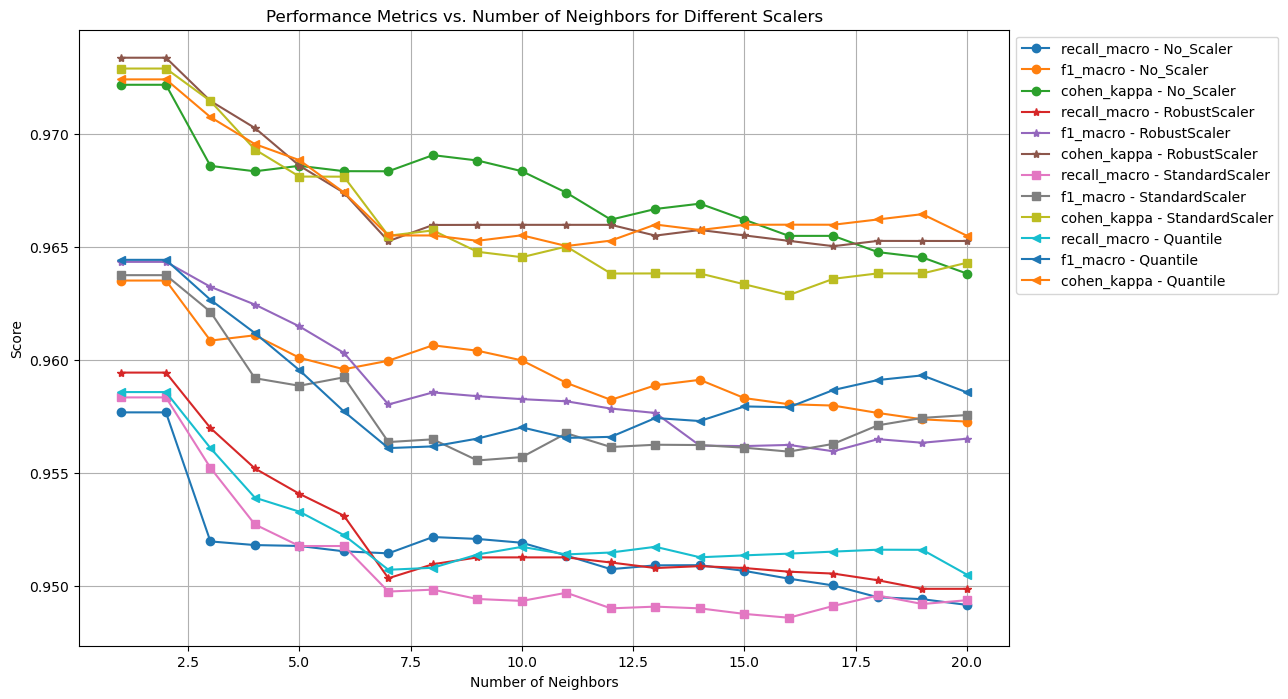

In [33]:
k_values = range(1, 21)

metrics = {
    'No_Scaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RobustScaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'StandardScaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Quantile': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1)
    kNN.fit(x_train, y_train)
    y_pred = kNN.predict(x_val)
    
    metrics['No_Scaler']['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
    metrics['No_Scaler']['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
    metrics['No_Scaler']['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

transformers = [
    ('RobustScaler', RobustScaler()),
    ('StandardScaler', StandardScaler()),
    ('Quantile', QuantileTransformer()),
]

for transformer_name, transformer_obj in transformers:
    for k in k_values:
        pipe_with_scaling = Pipeline([
            ('scaler', transformer_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1))
        ])
        pipe_with_scaling.fit(x_train, y_train)
        y_pred = pipe_with_scaling.predict(x_val)
        
        metrics[transformer_name]['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
        metrics[transformer_name]['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
        metrics[transformer_name]['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

plt.figure(figsize=(12, 8))
markers = {'No_Scaler': 'o', 'RobustScaler': '*', 'StandardScaler': 's', 'Quantile': '<',}

for scaler_name in metrics:
    for metric_name in metrics[scaler_name]:
        plt.plot(k_values, metrics[scaler_name][metric_name], marker=markers[scaler_name], label=f'{metric_name} - {scaler_name}')

plt.title('Performance Metrics vs. Number of Neighbors for Different Scalers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We don't see any significant difference between scalers and suppose that their performance is defined by weights of neighbors in kNN. So for future usage we chose RobustScaler as it shows slightly better results for recall metric for number of neighbors = 2.

In [34]:
pipe = Pipeline([
    ('robustscaler', RobustScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1))
])
pipe.fit(x_train, y_train)

new_row = {
    'Scaler': 'RobustScaler',
    'Sampler': None,
    'Weights': 'distance',
    'Number of neighbors': 2,
    'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, pipe.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, pipe.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, pipe.predict(x_val)),
    'Accuracy validation': pipe.score(x_val, y_val),
}
kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

Scaler Sampler   Weights Number of neighbors  Macro recall train  \
0          None    None   uniform                   5            0.920809   
1          None    None   uniform                   1            1.000000   
2          None    None  distance                   2            1.000000   
3  RobustScaler    None  distance                   2            1.000000   

   Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
0                 0.879720             0.881305                 0.881878   
1                 0.957682             0.963505                 0.972153   
2                 0.957682             0.963505                 0.972153   
3                 0.959439             0.964331                 0.973349   

   Accuracy validation  
0             0.898260  
1             0.976049  
2             0.976049  
3             0.977073

Next we try different samplers to work with imbalance.

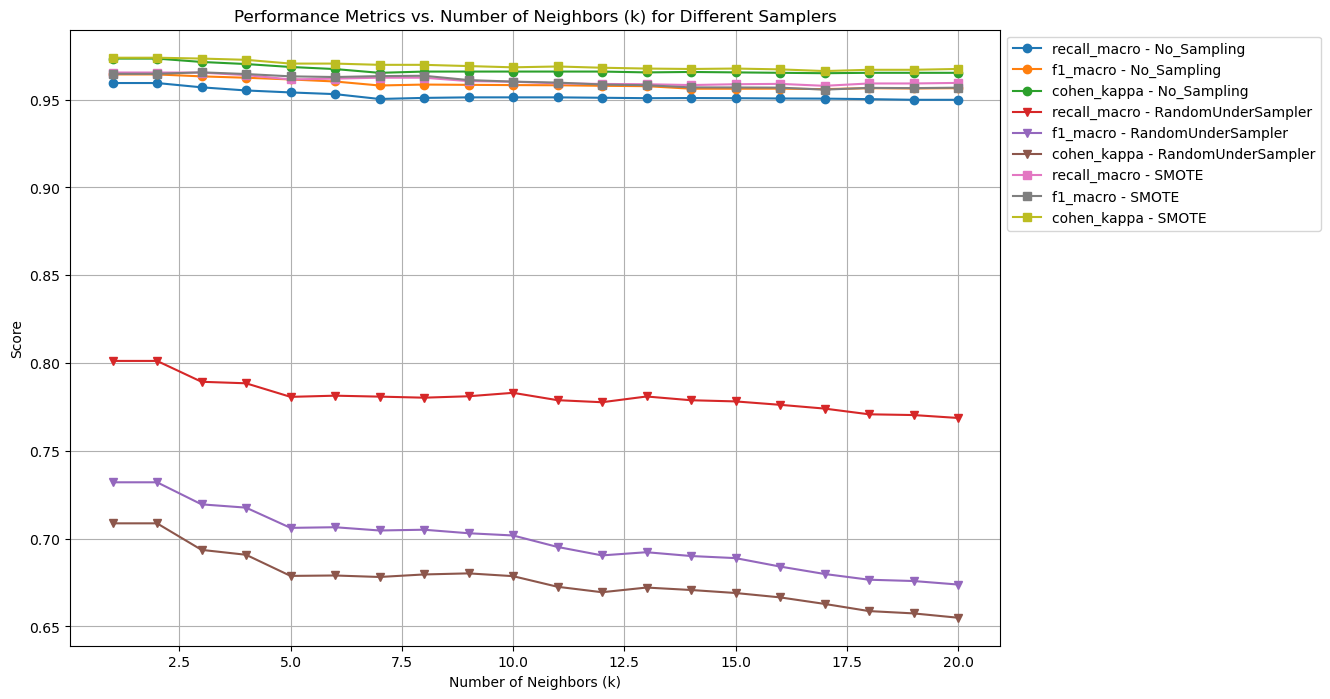

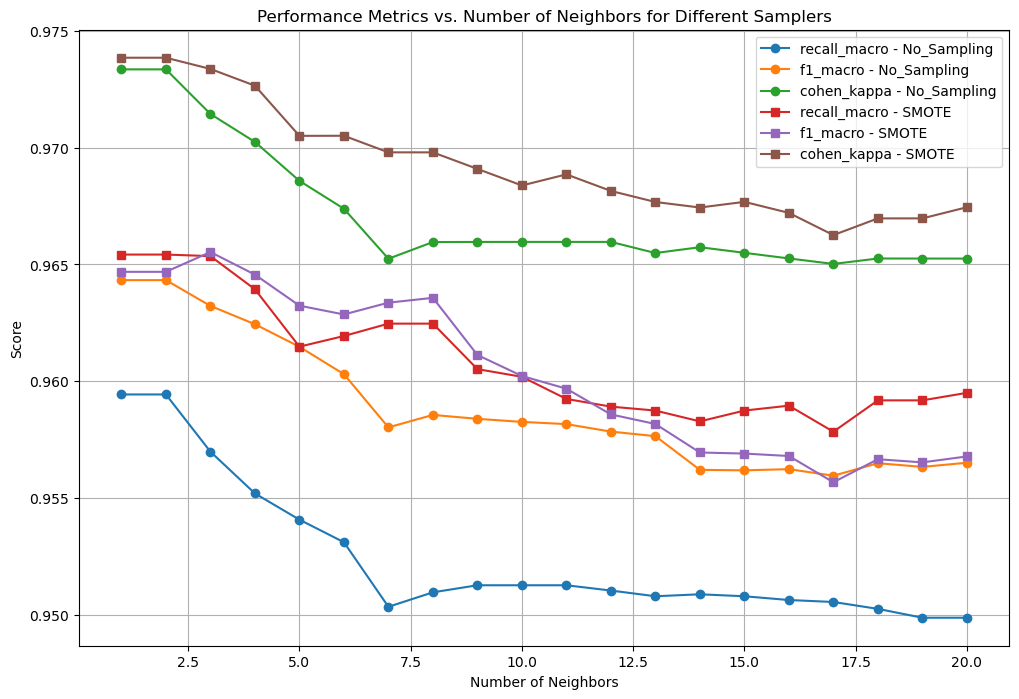

In [35]:
k_values = range(1, 21)

metrics = {
    'No_Sampling': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomUnderSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'SMOTE': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe_no_sampling = ImbPipeline([
        ('robustscaler', RobustScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1))
    ])
    pipe_no_sampling.fit(x_train, y_train)
    y_pred = pipe_no_sampling.predict(x_val)
    
    metrics['No_Sampling']['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
    metrics['No_Sampling']['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
    metrics['No_Sampling']['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    for k in k_values:
        pipe_with_sampling = ImbPipeline([
            ('robustscaler', RobustScaler()),
            ('sampler', sampler_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1))
        ])
        pipe_with_sampling.fit(x_train, y_train)
        y_pred = pipe_with_sampling.predict(x_val)

        metrics[sampler_name]['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
        metrics[sampler_name]['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
        metrics[sampler_name]['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

plt.figure(figsize=(12, 8))
markers = {'No_Sampling': 'o', 'RandomUnderSampler': 'v', 'SMOTE':'s'}

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Samplers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

for sampler_name in metrics:
    if sampler_name == 'RandomUnderSampler':
        continue
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors for Different Samplers')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


From the graph we observe that SMOTE gives the best results. Significantly worse then other samplers perform RandomUnderSampler (first graph).

In [36]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1))
])
pipe.fit(x_train, y_train)

new_row = {
    'Scaler': 'RobustScaler',
    'Sampler': 'SMOTE',
    'Weights': 'distance',
    'Number of neighbors': 2,
    'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, pipe.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, pipe.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, pipe.predict(x_val)),
    'Accuracy validation': pipe.score(x_val, y_val),
}

kNN_scores = pd.concat([kNN_scores, pd.DataFrame([new_row])], ignore_index=True)
display(kNN_scores)

Scaler Sampler   Weights Number of neighbors  Macro recall train  \
0          None    None   uniform                   5            0.920809   
1          None    None   uniform                   1            1.000000   
2          None    None  distance                   2            1.000000   
3  RobustScaler    None  distance                   2            1.000000   
4  RobustScaler   SMOTE  distance                   2            1.000000   

   Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
0                 0.879720             0.881305                 0.881878   
1                 0.957682             0.963505                 0.972153   
2                 0.957682             0.963505                 0.972153   
3                 0.959439             0.964331                 0.973349   
4                 0.965424             0.964686                 0.973847   

   Accuracy validation  
0             0.898260  
1             0.976049  
2             0.976049  
3             0.977073  
4             0.977482

Find the best model according recall metric:

In [37]:
kNN_scores_sorted = kNN_scores.sort_values(by='Macro recall validation', ascending=False)
display(kNN_scores_sorted)

Scaler Sampler   Weights Number of neighbors  Macro recall train  \
4  RobustScaler   SMOTE  distance                   2            1.000000   
3  RobustScaler    None  distance                   2            1.000000   
1          None    None   uniform                   1            1.000000   
2          None    None  distance                   2            1.000000   
0          None    None   uniform                   5            0.920809   

   Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
4                 0.965424             0.964686                 0.973847   
3                 0.959439             0.964331                 0.973349   
1                 0.957682             0.963505                 0.972153   
2                 0.957682             0.963505                 0.972153   
0                 0.879720             0.881305                 0.881878   

   Accuracy validation  
4             0.977482  
3             0.977073  
1             0.976049  
2             0.976049  
0             0.898260

Check overfitting for the model with best params.

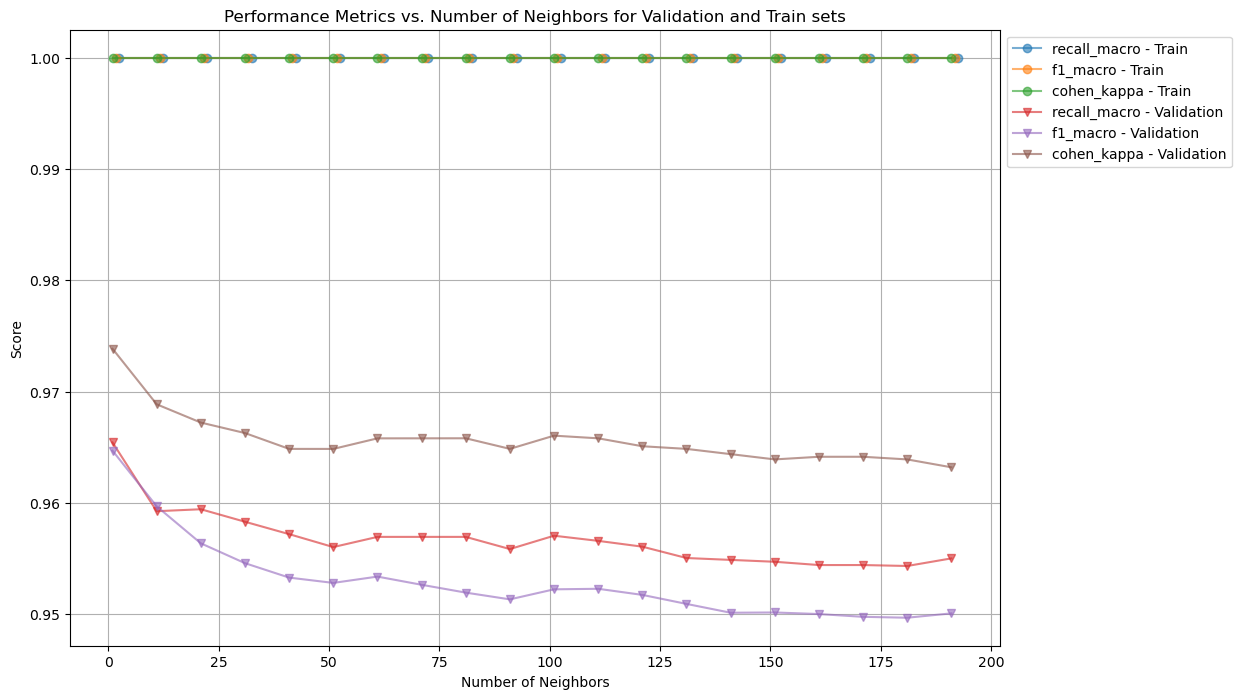

In [40]:
k_values = np.arange(1, 201, 10)

metrics = {
    'Train': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Validation': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe = ImbPipeline([
            ('robustscaler', RobustScaler()),
            ('SMOTE', SMOTE(random_state=42)),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-1))
    ])
    pipe.fit(x_train, y_train)
    
    metrics['Train']['recall_macro'].append(recall_score(y_train, pipe.predict(x_train), average='macro'))
    metrics['Train']['f1_macro'].append(f1_score(y_train, pipe.predict(x_train), average='macro'))
    metrics['Train']['cohen_kappa'].append(cohen_kappa_score(y_train, pipe.predict(x_train)))

    metrics['Validation']['recall_macro'].append(recall_score(y_val, pipe.predict(x_val), average='macro'))
    metrics['Validation']['f1_macro'].append(f1_score(y_val, pipe.predict(x_val), average='macro'))
    metrics['Validation']['cohen_kappa'].append(cohen_kappa_score(y_val, pipe.predict(x_val)))

plt.figure(figsize=(12, 8))
markers = {'Train': 'o', 'Validation': 'v', }
offset = {
    'Train': {'recall_macro': 1.5, 'f1_macro': 0.75, 'cohen_kappa': 0},
    'Validation': {'recall_macro': 0, 'f1_macro': 0, 'cohen_kappa': 0},
}

for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            k_values + offset[set][metric_name],
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )

plt.title('Performance Metrics vs. Number of Neighbors for Validation and Train sets')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


As metrics for train set do not depend on n_neighbors, we leave n_neighbors=2.

Make confusion matrix.

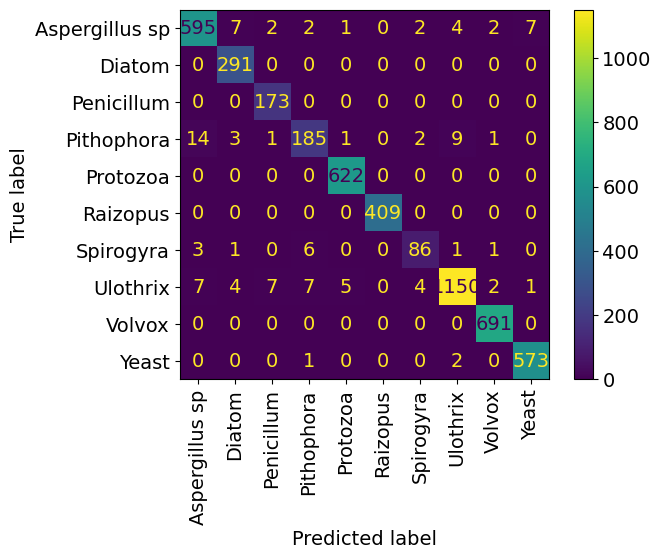

In [48]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1))
])
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)
cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

As we are dealing with multiclass classification, threshold is of no use. From the confusion matrix we observe that our error rate is not related to one specific class and is distributed among different classes.

Finally we validate our model with the best found params on actual test data and do confusion matrix.

Test metrics:
Macro recall: 0.9673836218861582
Macro f1: 0.9695353119899405
Cohens Kappa: 0.9788805809882789
Accuracy: 0.981821159515231


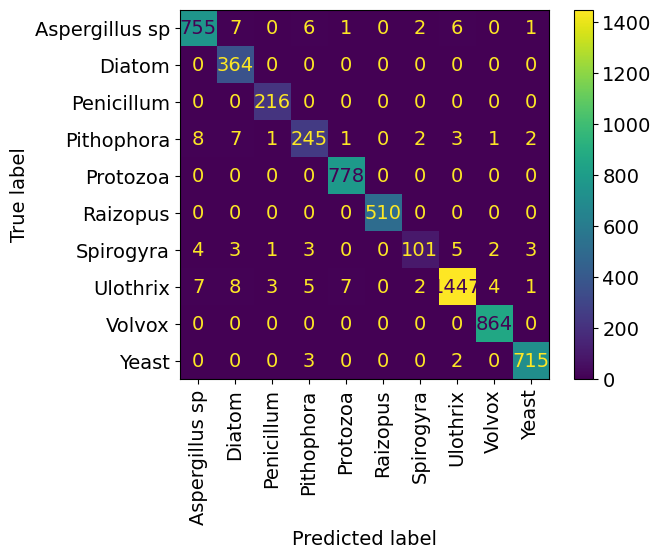

In [49]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1))
])
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print('Test metrics:')
print('Macro recall:', recall_score(y_test, predictions, average='macro'))
print('Macro f1:', f1_score(y_test, predictions, average='macro'))
print('Cohens Kappa:', cohen_kappa_score(y_test, predictions))
print('Accuracy:', pipe.score(x_test, y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### RandomForestClassifier

For better comparison of results we will save them into a dataframe. 

In [50]:
columns = [
    'Scaler',
    'Sampler',
    'n_estimators',
    'criterion',
    'max_features',
    'bootstrap',
    'Macro recall train',
    'Macro recall validation',
    'Macro f1 validation',
    'Cohens Kappa validation',
    'Accuracy validation',
    ]
randomforest_scores = pd.DataFrame(columns=columns)

Default model trained on data with duplicates:

In [51]:
randomforest = RandomForestClassifier(
    n_estimators=100, #default parameter
    criterion='gini', #default parameter
    max_features='sqrt', #default parameter
    bootstrap=True, #default parameter
    n_jobs=-1,
    random_state=42
    ) 
randomforest.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 100,
    'criterion':'gini',
    'max_features': 'sqrt',
    'bootstrap': 'True',
    'Macro recall train': recall_score(y_train, randomforest.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, randomforest.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, randomforest.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, randomforest.predict(x_val)),
    'Accuracy validation': randomforest.score(x_val, y_val),

}
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_9612\335518103.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)


Scaler Sampler n_estimators criterion max_features bootstrap  \
0   None    None          100      gini         sqrt      True   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0                 1.0                 0.956891             0.968205   

   Cohens Kappa validation  Accuracy validation  
0                 0.974495             0.978096

Look how bootstrap param influences results.

In [52]:
randomforest = RandomForestClassifier(
    n_estimators=100, #default parameter
    criterion='gini', #default parameter
    max_features='sqrt', #default parameter
    bootstrap=False,
    n_jobs=-1,
    random_state=42
    ) 
randomforest.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 100,
    'criterion': 'gini',
    'max_features': 'sqrt',
    'bootstrap': 'False',
    'Macro recall train': recall_score(y_train, randomforest.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, randomforest.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, randomforest.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, randomforest.predict(x_val)),
    'Accuracy validation': randomforest.score(x_val, y_val),
}
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

Scaler Sampler n_estimators criterion max_features bootstrap  \
0   None    None          100      gini         sqrt      True   
1   None    None          100      gini         sqrt     False   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0                 1.0                 0.956891             0.968205   
1                 1.0                 0.957659             0.969823   

   Cohens Kappa validation  Accuracy validation  
0                 0.974495             0.978096  
1                 0.976155             0.979529

Bootstrap=False didn't make results any better, so we will continue using default value boostrap=True.

Try different criterions. 

In [53]:
randomforest = RandomForestClassifier(
    n_estimators=100, #default parameter
    criterion='entropy',
    max_features='sqrt', #default parameter
    bootstrap=True,
    n_jobs=-1,
    random_state=42
    ) 
randomforest.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_features': 'sqrt',
    'bootstrap': 'True',
    'Macro recall train': recall_score(y_train, randomforest.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, randomforest.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, randomforest.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, randomforest.predict(x_val)),
    'Accuracy validation': randomforest.score(x_val, y_val),
}
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

Scaler Sampler n_estimators criterion max_features bootstrap  \
0   None    None          100      gini         sqrt      True   
1   None    None          100      gini         sqrt     False   
2   None    None          100   entropy         sqrt      True   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0                 1.0                 0.956891             0.968205   
1                 1.0                 0.957659             0.969823   
2                 1.0                 0.955585             0.966580   

   Cohens Kappa validation  Accuracy validation  
0                 0.974495             0.978096  
1                 0.976155             0.979529  
2                 0.973302             0.977073

Criterion = entropy did Macro recall slightly worse so we will use default criterion=gini.

Adjust n_estimators and max_features params according to the rule: more n_estimators and less max_features is better to reduce overfitting:

In [54]:
randomforest = RandomForestClassifier(
    n_estimators=1000,
    max_features='sqrt', #default parameter
    n_jobs=-1,
    random_state=42
    ) 
randomforest.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 1000,
    'criterion': 'gini',
    'max_features': 'sqrt',
    'bootstrap': 'True',
    'Macro recall train': recall_score(y_train, randomforest.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, randomforest.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, randomforest.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, randomforest.predict(x_val)),
    'Accuracy validation': randomforest.score(x_val, y_val),
}
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

Scaler Sampler n_estimators criterion max_features bootstrap  \
0   None    None          100      gini         sqrt      True   
1   None    None          100      gini         sqrt     False   
2   None    None          100   entropy         sqrt      True   
3   None    None         1000      gini         sqrt      True   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0                 1.0                 0.956891             0.968205   
1                 1.0                 0.957659             0.969823   
2                 1.0                 0.955585             0.966580   
3                 1.0                 0.954564             0.966536   

   Cohens Kappa validation  Accuracy validation  
0                 0.974495             0.978096  
1                 0.976155             0.979529  
2                 0.973302             0.977073  
3                 0.973058             0.976868

In [55]:
randomforest = RandomForestClassifier(
    n_estimators=1000,
    max_features=3,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
    ) 
randomforest.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 1000,
    'criterion': 'gini',
    'max_features': 3,
    'bootstrap': 'True',
    'Macro recall train': recall_score(y_train, randomforest.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, randomforest.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, randomforest.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, randomforest.predict(x_val)),
    'Accuracy validation': randomforest.score(x_val, y_val),
}
randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)
display(randomforest_scores)

Scaler Sampler n_estimators criterion max_features bootstrap  \
0   None    None          100      gini         sqrt      True   
1   None    None          100      gini         sqrt     False   
2   None    None          100   entropy         sqrt      True   
3   None    None         1000      gini         sqrt      True   
4   None    None         1000      gini            3      True   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0                 1.0                 0.956891             0.968205   
1                 1.0                 0.957659             0.969823   
2                 1.0                 0.955585             0.966580   
3                 1.0                 0.954564             0.966536   
4                 1.0                 0.954591             0.967073   

   Cohens Kappa validation  Accuracy validation  
0                 0.974495             0.978096  
1                 0.976155             0.979529  
2                 0.973302             0.977073  
3                 0.973058             0.976868  
4                 0.973767             0.977482

Make a graph to compare results for different n_estimators:

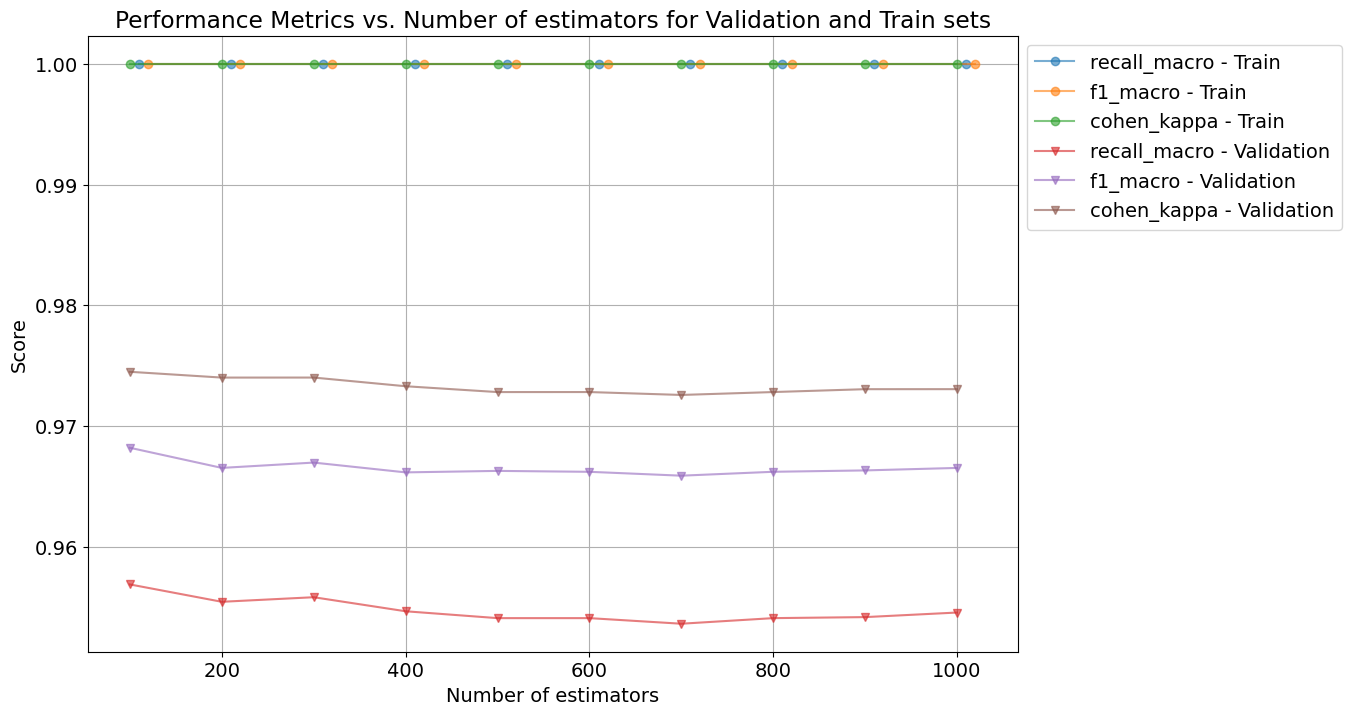

In [57]:
n_estimators_values = np.arange(100, 1001, 100)

metrics = {
    'Train': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Validation': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for n in n_estimators_values:
    forest = RandomForestClassifier(
        n_estimators=n,
        n_jobs=-1,
        random_state=42
    )
    forest.fit(x_train, y_train)

    metrics['Train']['recall_macro'].append(recall_score(y_train, forest.predict(x_train), average='macro'))
    metrics['Train']['f1_macro'].append(f1_score(y_train, forest.predict(x_train), average='macro'))
    metrics['Train']['cohen_kappa'].append(cohen_kappa_score(y_train, forest.predict(x_train)))

    metrics['Validation']['recall_macro'].append(recall_score(y_val, forest.predict(x_val), average='macro'))
    metrics['Validation']['f1_macro'].append(f1_score(y_val, forest.predict(x_val), average='macro'))
    metrics['Validation']['cohen_kappa'].append(cohen_kappa_score(y_val, forest.predict(x_val)))

plt.figure(figsize=(12, 8))
markers = {'Train': 'o', 'Validation': 'v', }
offset = {
    'Train': {'recall_macro': 10, 'f1_macro': 20, 'cohen_kappa': 0},
    'Validation': {'recall_macro': 0, 'f1_macro': 0, 'cohen_kappa': 0},
}

for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            n_estimators_values + offset[set][metric_name],
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )

plt.title('Performance Metrics vs. Number of estimators for Validation and Train sets')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


Do the graph for max features parameter for number of estimators=1000.

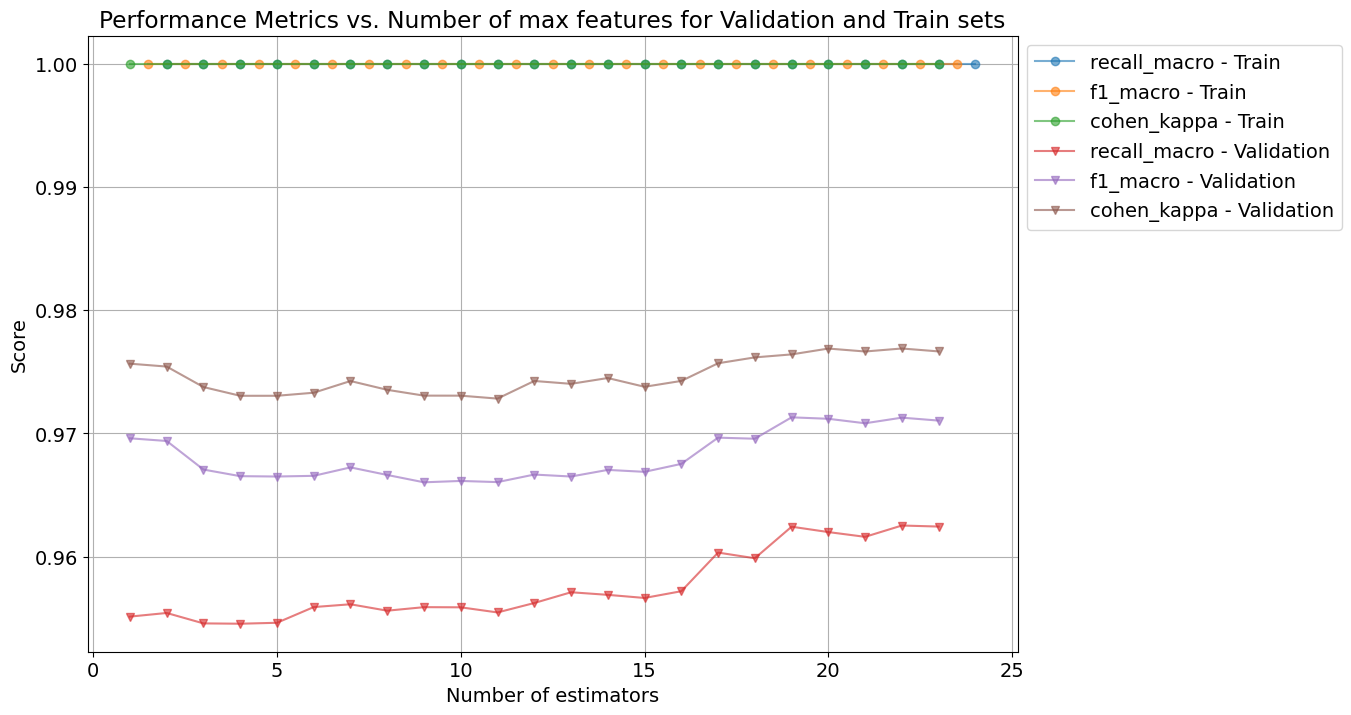

In [58]:
max_features_values = np.arange(1, 24, 1)

metrics = {
    'Train': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Validation': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for m in max_features_values:
    forest = RandomForestClassifier(
        n_estimators=1000,
        max_features=m,
        n_jobs=-1,
        random_state=42
    )
    forest.fit(x_train, y_train)

    metrics['Train']['recall_macro'].append(recall_score(y_train, forest.predict(x_train), average='macro'))
    metrics['Train']['f1_macro'].append(f1_score(y_train, forest.predict(x_train), average='macro'))
    metrics['Train']['cohen_kappa'].append(cohen_kappa_score(y_train, forest.predict(x_train)))

    metrics['Validation']['recall_macro'].append(recall_score(y_val, forest.predict(x_val), average='macro'))
    metrics['Validation']['f1_macro'].append(f1_score(y_val, forest.predict(x_val), average='macro'))
    metrics['Validation']['cohen_kappa'].append(cohen_kappa_score(y_val, forest.predict(x_val)))

plt.figure(figsize=(12, 8))
markers = {'Train': 'o', 'Validation': 'v', }
offset = {
    'Train': {'recall_macro': 1, 'f1_macro': 0.5, 'cohen_kappa': 0},
    'Validation': {'recall_macro': 0, 'f1_macro': 0, 'cohen_kappa': 0},
}

for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            max_features_values + offset[set][metric_name],
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )

plt.title('Performance Metrics vs. Number of max features for Validation and Train sets')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


!!!!Making number of estimators bigger and max number of features smaller didn't influence model significantly, so we will continue use default parameters: n_estimators=100, max_features=sqrt (=4 in our case).!!!!

Try random forest with different transformers.

In [48]:
transformers = [
    ('RobustScaler', RobustScaler()),
    ('StandardScaler', StandardScaler()),
    ('Quantile', QuantileTransformer()),
]

for transformer_name, transformer_obj in transformers:
    pipe = ImbPipeline([
        ('scaler', transformer_obj),
        ('forest', RandomForestClassifier(
            n_estimators=100, #default value
            max_features='sqrt', #default value
            bootstrap=True, #default value
            n_jobs=-1,
            random_state=42
        ))
    ])
    pipe.fit(x_train, y_train)

    new_row = {
        'Scaler': transformer_name,
        'Sampler': None,
        'n_estimators': 100,
        'criterion': 'gini',
        'max_features': 'sqrt',
        'bootstrap': 'True',
        'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
        'Macro recall validation': recall_score(y_val, pipe.predict(x_val), average='macro'),
        'Macro f1 validation': f1_score(y_val, pipe.predict(x_val), average='macro'),
        'Cohens Kappa validation': cohen_kappa_score(y_val, pipe.predict(x_val)),
        'Accuracy validation': pipe.score(x_val, y_val),
    }
    randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)

display(randomforest_scores)

Scaler Sampler With/without duplicates n_estimators criterion  \
0            None    None                    With          100      gini   
1            None    None                 Without          100      gini   
2            None    None                 Without          100      gini   
3            None    None                 Without          100   entropy   
4            None    None                 Without         1000      gini   
5            None    None                 Without         1000      gini   
6    RobustScaler    None                 Without          100      gini   
7  StandardScaler    None                 Without          100      gini   
8        Quantile    None                 Without          100      gini   

  max_features bootstrap  Macro recall train  Macro recall validation  \
0         sqrt      True                 1.0                 0.956891   
1         sqrt      True                 1.0                 0.960419   
2         sqrt     False                 1.0                 0.960964   
3         sqrt      True                 1.0                 0.958617   
4         sqrt      True                 1.0                 0.959693   
5            3      True                 1.0                 0.957509   
6         sqrt      True                 1.0                 0.960124   
7         sqrt      True                 1.0                 0.958925   
8         sqrt      True                 1.0                 0.959093   

   Macro f1 validation  Cohens Kappa validation  Accuracy validation  
0             0.968205                 0.974495             0.978096  
1             0.972076                 0.977826             0.980962  
2             0.970692                 0.976646             0.979939  
3             0.970428                 0.976157             0.979529  
4             0.971761                 0.977348             0.980553  
5             0.970072                 0.976392             0.979734  
6             0.972414                 0.978061             0.981167  
7             0.971122                 0.976868             0.980143  
8             0.971744                 0.977344             0.980553

RobustScaler showed slightly better results so we will use it further.

In [49]:
samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    pipe = ImbPipeline([
        ('scaler', RobustScaler()),
        ('sampler', sampler_obj),
        ('forest', RandomForestClassifier(
            n_estimators=100,
            max_features='sqrt',
            bootstrap=True,
            n_jobs=-1,
            random_state=42
        ))
    ])
    pipe.fit(x_train, y_train)

    new_row = {
        'Scaler': 'RobustScaler',
        'Sampler': sampler_name,
        'n_estimators': 100,
        'criterion': 'gini',
        'max_features': 'sqrt',
        'bootstrap': 'True',
        'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
        'Macro recall validation': recall_score(y_val, pipe.predict(x_val), average='macro'),
        'Macro f1 validation': f1_score(y_val, pipe.predict(x_val), average='macro'),
        'Cohens Kappa validation': cohen_kappa_score(y_val, pipe.predict(x_val)),
        'Accuracy validation': pipe.score(x_val, y_val),
    }
    randomforest_scores = pd.concat([randomforest_scores, pd.DataFrame([new_row])], ignore_index=True)

display(randomforest_scores)

Scaler             Sampler With/without duplicates n_estimators  \
0             None                None                    With          100   
1             None                None                 Without          100   
2             None                None                 Without          100   
3             None                None                 Without          100   
4             None                None                 Without         1000   
5             None                None                 Without         1000   
6     RobustScaler                None                 Without          100   
7   StandardScaler                None                 Without          100   
8         Quantile                None                 Without          100   
9     RobustScaler  RandomUnderSampler                 Without          100   
10    RobustScaler               SMOTE                 Without          100   

   criterion max_features bootstrap  Macro recall train  \
0       gini         sqrt      True            1.000000   
1       gini         sqrt      True            1.000000   
2       gini         sqrt     False            1.000000   
3    entropy         sqrt      True            1.000000   
4       gini         sqrt      True            1.000000   
5       gini            3      True            1.000000   
6       gini         sqrt      True            1.000000   
7       gini         sqrt      True            1.000000   
8       gini         sqrt      True            1.000000   
9       gini         sqrt      True            0.718804   
10      gini         sqrt      True            1.000000   

    Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
0                  0.956891             0.968205                 0.974495   
1                  0.960419             0.972076                 0.977826   
2                  0.960964             0.970692                 0.976646   
3                  0.958617             0.970428                 0.976157   
4                  0.959693             0.971761                 0.977348   
5                  0.957509             0.970072                 0.976392   
6                  0.960124             0.972414                 0.978061   
7                  0.958925             0.971122                 0.976868   
8                  0.959093             0.971744                 0.977344   
9                  0.716941             0.607084                 0.579023   
10                 0.966926             0.965970                 0.975269   

    Accuracy validation  
0              0.978096  
1              0.980962  
2              0.979939  
3              0.979529  
4              0.980553  
5              0.979734  
6              0.981167  
7              0.980143  
8              0.980553  
9              0.624770  
10             0.978710

SMOTE showed slightly better results.

Find the best model according recall metric:

In [50]:
randomforest_scores_sorted = randomforest_scores.sort_values(by='Macro recall validation', ascending=False)
display(randomforest_scores_sorted)

Scaler             Sampler With/without duplicates n_estimators  \
10    RobustScaler               SMOTE                 Without          100   
2             None                None                 Without          100   
1             None                None                 Without          100   
6     RobustScaler                None                 Without          100   
4             None                None                 Without         1000   
8         Quantile                None                 Without          100   
7   StandardScaler                None                 Without          100   
3             None                None                 Without          100   
5             None                None                 Without         1000   
0             None                None                    With          100   
9     RobustScaler  RandomUnderSampler                 Without          100   

   criterion max_features bootstrap  Macro recall train  \
10      gini         sqrt      True            1.000000   
2       gini         sqrt     False            1.000000   
1       gini         sqrt      True            1.000000   
6       gini         sqrt      True            1.000000   
4       gini         sqrt      True            1.000000   
8       gini         sqrt      True            1.000000   
7       gini         sqrt      True            1.000000   
3    entropy         sqrt      True            1.000000   
5       gini            3      True            1.000000   
0       gini         sqrt      True            1.000000   
9       gini         sqrt      True            0.718804   

    Macro recall validation  Macro f1 validation  Cohens Kappa validation  \
10                 0.966926             0.965970                 0.975269   
2                  0.960964             0.970692                 0.976646   
1                  0.960419             0.972076                 0.977826   
6                  0.960124             0.972414                 0.978061   
4                  0.959693             0.971761                 0.977348   
8                  0.959093             0.971744                 0.977344   
7                  0.958925             0.971122                 0.976868   
3                  0.958617             0.970428                 0.976157   
5                  0.957509             0.970072                 0.976392   
0                  0.956891             0.968205                 0.974495   
9                  0.716941             0.607084                 0.579023   

    Accuracy validation  
10             0.978710  
2              0.979939  
1              0.980962  
6              0.981167  
4              0.980553  
8              0.980553  
7              0.980143  
3              0.979529  
5              0.979734  
0              0.978096  
9              0.624770

Look at the feature importance for the model with the best params.

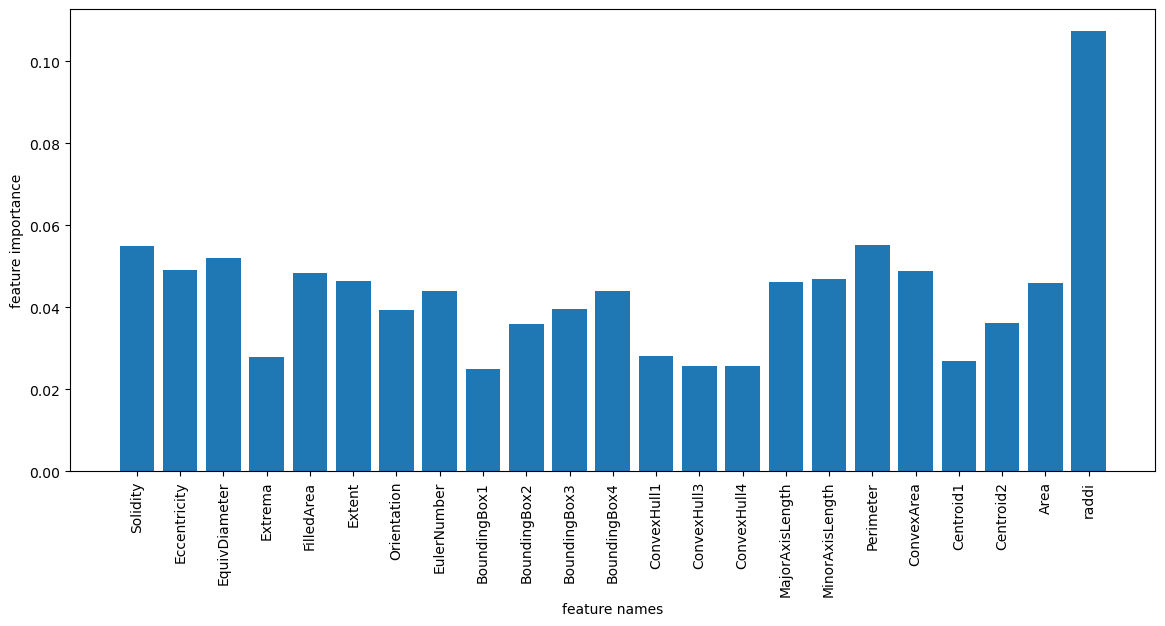

In [51]:
pipe= ImbPipeline([
    ('robust_scaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('forest', RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])

pipe.fit(x_train, y_train)

plt.figure(figsize=(14,6))
plt.bar(list(x_train.columns), pipe.named_steps['forest'].feature_importances_)
plt.xlabel('feature names')
plt.ylabel('feature importance')
plt.xticks(rotation=90)
plt.show()

Make confusion matrix.

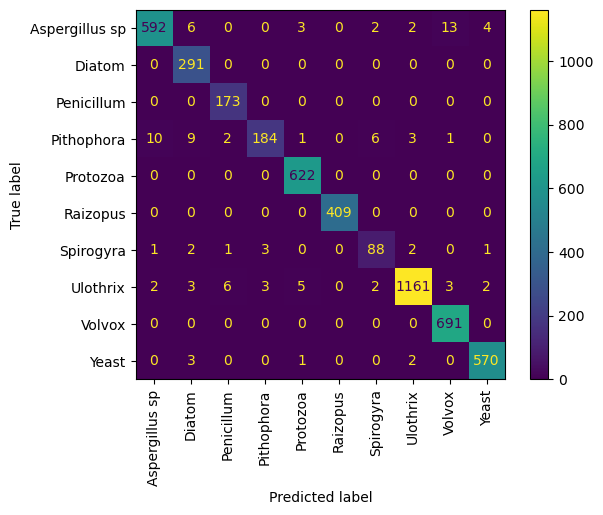

In [52]:
pipe= ImbPipeline([
    ('robust_scaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('forest', RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)
cm = confusion_matrix(y_val, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

Finally we validate our model with the best found params on actual test data and do confusion matrix.

Test metrics:
Macro recall: 0.9671625410829152
Macro f1: 0.9692879781116289
Cohens Kappa: 0.9771715844924298
Accuracy: 0.9803471994759253


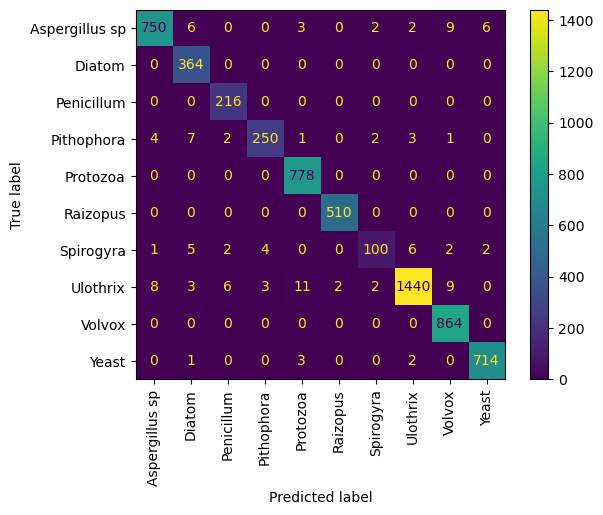

In [53]:
pipe= ImbPipeline([
    ('robust_scaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('forest', RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print('Test metrics:')
print('Macro recall:', recall_score(y_test, predictions, average='macro'))
print('Macro f1:', f1_score(y_test, predictions, average='macro'))
print('Cohens Kappa:', cohen_kappa_score(y_test, predictions))
print('Accuracy:', pipe.score(x_test, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### GradientBoostingClassifier

For better comparison of results we will save them into a dataframe. 

In [54]:
columns = [
    'Scaler',
    'Sampler',
    'n_estimators',
    'criterion',
    'Macro recall train',
    'Macro recall validation',
    'Macro f1 validation',
    'Cohens Kappa validation',
    'Accuracy validation',
    ]
gradient_scores = pd.DataFrame(columns=columns)

Default model:

In [56]:
gradient = GradientBoostingClassifier(
    n_estimators=100, #default parameter
    criterion='friedman_mse', #default parameter
    random_state=42
    ) 
gradient.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 100,
    'criterion': 'friedman_mse',
    'Macro recall train': recall_score(y_train, gradient.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, gradient.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, gradient.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, gradient.predict(x_val)),
    'Accuracy validation': gradient.score(x_val, y_val),
}
gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)
display(gradient_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_8712\4073363043.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)


Scaler Sampler With/without duplicates n_estimators     criterion  \
0   None    None                    With          100  friedman_mse   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0            0.884466                 0.855763             0.872184   

   Cohens Kappa validation  Accuracy validation  
0                 0.837819             0.861208

Try another criterion:

In [58]:
gradient = GradientBoostingClassifier(
    n_estimators=100, #default parameter
    criterion='squared_error',
    random_state=42
    ) 
gradient.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 100,
    'criterion': 'squared_error',
    'Macro recall train': recall_score(y_train, gradient.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, gradient.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, gradient.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, gradient.predict(x_val)),
    'Accuracy validation': gradient.score(x_val, y_val),
}
gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)
display(gradient_scores)

Scaler Sampler With/without duplicates n_estimators      criterion  \
0   None    None                    With          100   friedman_mse   
1   None    None                 Without          100   friedman_mse   
2   None    None                 Without          100  squared_error   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0            0.884466                 0.855763             0.872184   
1            0.849238                 0.860647             0.886239   
2            0.849238                 0.860647             0.886239   

   Cohens Kappa validation  Accuracy validation  
0                 0.837819             0.861208  
1                 0.838259             0.862436  
2                 0.838259             0.862436

Adjust number of estimators:

In [59]:
gradient = GradientBoostingClassifier(
    n_estimators=1000,
    criterion='friedman_mse', #default parameter
    random_state=42
    ) 
gradient.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 1000,
    'criterion': 'friedman_mse',
    'Macro recall train': recall_score(y_train, gradient.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, gradient.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, gradient.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, gradient.predict(x_val)),
    'Accuracy validation': gradient.score(x_val, y_val),
}
gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)
display(gradient_scores)

Scaler Sampler With/without duplicates n_estimators      criterion  \
0   None    None                    With          100   friedman_mse   
1   None    None                 Without          100   friedman_mse   
2   None    None                 Without          100  squared_error   
3   None    None                 Without         1000   friedman_mse   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0            0.884466                 0.855763             0.872184   
1            0.849238                 0.860647             0.886239   
2            0.849238                 0.860647             0.886239   
3            1.000000                 0.978697             0.984550   

   Cohens Kappa validation  Accuracy validation  
0                 0.837819             0.861208  
1                 0.838259             0.862436  
2                 0.838259             0.862436  
3                 0.987619             0.989355

In [60]:
gradient = GradientBoostingClassifier(
    n_estimators=1000,
    criterion='squared_error',
    random_state=42
    ) 
gradient.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 1000,
    'criterion': 'squared_error',
    'Macro recall train': recall_score(y_train, gradient.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, gradient.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, gradient.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, gradient.predict(x_val)),
    'Accuracy validation': gradient.score(x_val, y_val),
}
gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)
display(gradient_scores)

Scaler Sampler With/without duplicates n_estimators      criterion  \
0   None    None                    With          100   friedman_mse   
1   None    None                 Without          100   friedman_mse   
2   None    None                 Without          100  squared_error   
3   None    None                 Without         1000   friedman_mse   
4   None    None                 Without         1000  squared_error   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0            0.884466                 0.855763             0.872184   
1            0.849238                 0.860647             0.886239   
2            0.849238                 0.860647             0.886239   
3            1.000000                 0.978697             0.984550   
4            1.000000                 0.978697             0.984550   

   Cohens Kappa validation  Accuracy validation  
0                 0.837819             0.861208  
1                 0.838259             0.862436  
2                 0.838259             0.862436  
3                 0.987619             0.989355  
4                 0.987619             0.989355

Both criterions show the same result. According to the documentation: "‘friedman_mse’ for the mean squared error with improvement score by Friedman, ‘squared_error’ for mean squared error". From this quote we suppose it is not that strange that results are the same for both criterions, so there is no mistake. As this parameter makes no difference for our data set, we will continue to use default parameter: criterion='friedman_mse'.

As increasing number of estimators makes significant change in the results, we want to investigate this question further:

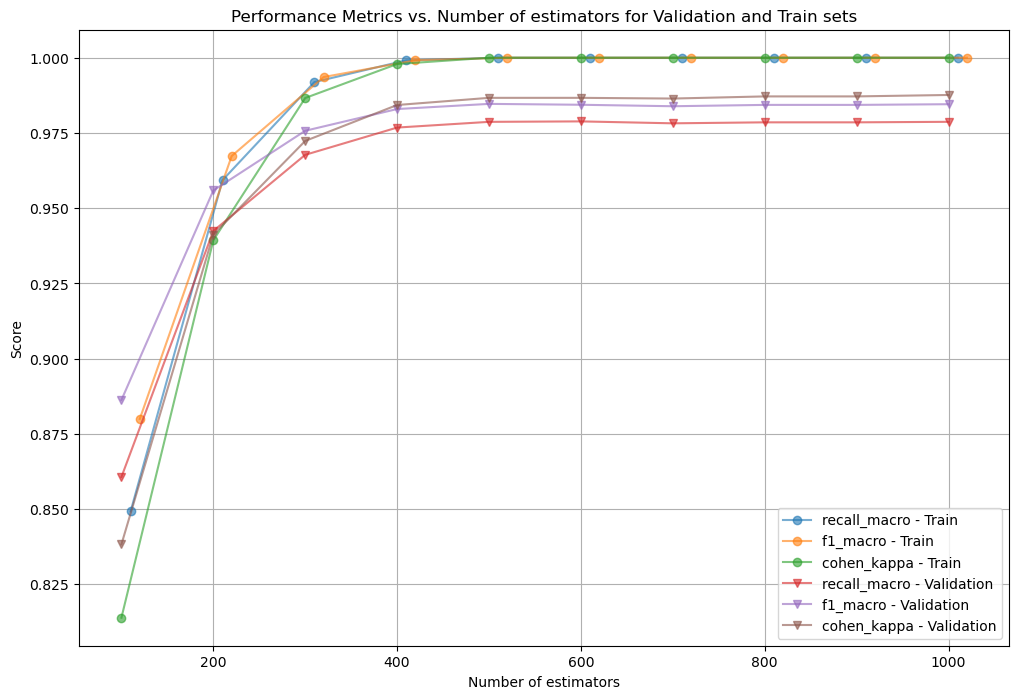

In [61]:
n_estimators_values = np.arange(100, 1001, 100)

metrics = {
    'Train': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Validation': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for n in n_estimators_values:
    gradient = GradientBoostingClassifier(
        n_estimators=n,
        random_state=42
    )
    gradient.fit(x_train, y_train)

    metrics['Train']['recall_macro'].append(recall_score(y_train, gradient.predict(x_train), average='macro'))
    metrics['Train']['f1_macro'].append(f1_score(y_train, gradient.predict(x_train), average='macro'))
    metrics['Train']['cohen_kappa'].append(cohen_kappa_score(y_train, gradient.predict(x_train)))

    metrics['Validation']['recall_macro'].append(recall_score(y_val, gradient.predict(x_val), average='macro'))
    metrics['Validation']['f1_macro'].append(f1_score(y_val, gradient.predict(x_val), average='macro'))
    metrics['Validation']['cohen_kappa'].append(cohen_kappa_score(y_val, gradient.predict(x_val)))

plt.figure(figsize=(12, 8))

markers = {'Train': 'o', 'Validation': 'v', }
offset = {
    'Train': {'recall_macro': 10, 'f1_macro': 20, 'cohen_kappa': 0},
    'Validation': {'recall_macro': 0, 'f1_macro': 0, 'cohen_kappa': 0},
}

for set in metrics:
    for metric_name in metrics[set]:
        plt.plot(
            n_estimators_values + offset[set][metric_name],
            metrics[set][metric_name],
            marker=markers[set],
            label=f'{metric_name} - {set}',
            alpha=0.6
            )


plt.title('Performance Metrics vs. Number of estimators for Validation and Train sets')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()

We see that from number of estimators=500 metrics do not increase anymore so we will use n_estimators=500.

In [62]:
gradient = GradientBoostingClassifier(
    n_estimators=500,
    criterion='friedman_mse',
    random_state=42
    ) 
gradient.fit(x_train, y_train)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'n_estimators': 500,
    'criterion': 'friedman_mse',
    'Macro recall train': recall_score(y_train, gradient.predict(x_train), average='macro'),
    'Macro recall validation': recall_score(y_val, gradient.predict(x_val), average='macro'),
    'Macro f1 validation': f1_score(y_val, gradient.predict(x_val), average='macro'),
    'Cohens Kappa validation': cohen_kappa_score(y_val, gradient.predict(x_val)),
    'Accuracy validation': gradient.score(x_val, y_val),
}
gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)
display(gradient_scores)

Scaler Sampler With/without duplicates n_estimators      criterion  \
0   None    None                    With          100   friedman_mse   
1   None    None                 Without          100   friedman_mse   
2   None    None                 Without          100  squared_error   
3   None    None                 Without         1000   friedman_mse   
4   None    None                 Without         1000  squared_error   
5   None    None                 Without          500   friedman_mse   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0            0.884466                 0.855763             0.872184   
1            0.849238                 0.860647             0.886239   
2            0.849238                 0.860647             0.886239   
3            1.000000                 0.978697             0.984550   
4            1.000000                 0.978697             0.984550   
5            1.000000                 0.978688             0.984658   

   Cohens Kappa validation  Accuracy validation  
0                 0.837819             0.861208  
1                 0.838259             0.862436  
2                 0.838259             0.862436  
3                 0.987619             0.989355  
4                 0.987619             0.989355  
5                 0.986665             0.988536

Try different scalers:

In [63]:
transformers = [
    ('RobustScaler', RobustScaler()),
    ('StandardScaler', StandardScaler()),
    ('Quantile', QuantileTransformer()),
]

for transformer_name, transformer_obj in transformers:
    pipe = ImbPipeline([
        ('scaler', transformer_obj),
        ('gradient', GradientBoostingClassifier(
            n_estimators=500,
            random_state=42
        ))
    ])
    pipe.fit(x_train, y_train)

    new_row = {
        'Scaler': transformer_name,
        'Sampler': None,
        'n_estimators': 500,
        'criterion': 'friedman_mse',
        'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
        'Macro recall validation': recall_score(y_val, pipe.predict(x_val), average='macro'),
        'Macro f1 validation': f1_score(y_val, pipe.predict(x_val), average='macro'),
        'Cohens Kappa validation': cohen_kappa_score(y_val, pipe.predict(x_val)),
        'Accuracy validation': pipe.score(x_val, y_val),
    }
    gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)

display(gradient_scores)

Scaler Sampler With/without duplicates n_estimators      criterion  \
0            None    None                    With          100   friedman_mse   
1            None    None                 Without          100   friedman_mse   
2            None    None                 Without          100  squared_error   
3            None    None                 Without         1000   friedman_mse   
4            None    None                 Without         1000  squared_error   
5            None    None                 Without          500   friedman_mse   
6    RobustScaler    None                 Without          500   friedman_mse   
7  StandardScaler    None                 Without          500   friedman_mse   
8        Quantile    None                 Without          500   friedman_mse   

   Macro recall train  Macro recall validation  Macro f1 validation  \
0            0.884466                 0.855763             0.872184   
1            0.849238                 0.860647             0.886239   
2            0.849238                 0.860647             0.886239   
3            1.000000                 0.978697             0.984550   
4            1.000000                 0.978697             0.984550   
5            1.000000                 0.978688             0.984658   
6            1.000000                 0.978688             0.984658   
7            1.000000                 0.978688             0.984658   
8            1.000000                 0.978688             0.984658   

   Cohens Kappa validation  Accuracy validation  
0                 0.837819             0.861208  
1                 0.838259             0.862436  
2                 0.838259             0.862436  
3                 0.987619             0.989355  
4                 0.987619             0.989355  
5                 0.986665             0.988536  
6                 0.986665             0.988536  
7                 0.986665             0.988536  
8                 0.986665             0.988536

Try samplers with RobustScaler:

In [64]:
samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    pipe = ImbPipeline([
        ('scaler', RobustScaler()),
        ('sampler', sampler_obj),
        ('gradient', GradientBoostingClassifier(
            n_estimators=500,
            random_state=42
        ))
    ])
    pipe.fit(x_train, y_train)

    new_row = {
        'Scaler': 'RobustScaler',
        'Sampler': sampler_name,
        'n_estimators': 500,
        'criterion': 'friedman_mse',
        'Macro recall train': recall_score(y_train, pipe.predict(x_train), average='macro'),
        'Macro recall validation': recall_score(y_val, pipe.predict(x_val), average='macro'),
        'Macro f1 validation': f1_score(y_val, pipe.predict(x_val), average='macro'),
        'Cohens Kappa validation': cohen_kappa_score(y_val, pipe.predict(x_val)),
        'Accuracy validation': pipe.score(x_val, y_val),
    }
    gradient_scores = pd.concat([gradient_scores, pd.DataFrame([new_row])], ignore_index=True)

display(gradient_scores)

Scaler             Sampler With/without duplicates n_estimators  \
0             None                None                    With          100   
1             None                None                 Without          100   
2             None                None                 Without          100   
3             None                None                 Without         1000   
4             None                None                 Without         1000   
5             None                None                 Without          500   
6     RobustScaler                None                 Without          500   
7   StandardScaler                None                 Without          500   
8         Quantile                None                 Without          500   
9     RobustScaler  RandomUnderSampler                 Without          500   
10    RobustScaler               SMOTE                 Without          500   

        criterion  Macro recall train  Macro recall validation  \
0    friedman_mse            0.884466                 0.855763   
1    friedman_mse            0.849238                 0.860647   
2   squared_error            0.849238                 0.860647   
3    friedman_mse            1.000000                 0.978697   
4   squared_error            1.000000                 0.978697   
5    friedman_mse            1.000000                 0.978688   
6    friedman_mse            1.000000                 0.978688   
7    friedman_mse            1.000000                 0.978688   
8    friedman_mse            1.000000                 0.978688   
9            gini            0.788919                 0.790623   
10           gini            0.981337                 0.958294   

    Macro f1 validation  Cohens Kappa validation  Accuracy validation  \
0              0.872184                 0.837819             0.861208   
1              0.886239                 0.838259             0.862436   
2              0.886239                 0.838259             0.862436   
3              0.984550                 0.987619             0.989355   
4              0.984550                 0.987619             0.989355   
5              0.984658                 0.986665             0.988536   
6              0.984658                 0.986665             0.988536   
7              0.984658                 0.986665             0.988536   
8              0.984658                 0.986665             0.988536   
9              0.703102                 0.673294             0.711975   
10             0.955511                 0.957941             0.963767   

   max_features bootstrap  
0           NaN       NaN  
1           NaN       NaN  
2           NaN       NaN  
3           NaN       NaN  
4           NaN       NaN  
5           NaN       NaN  
6           NaN       NaN  
7           NaN       NaN  
8           NaN       NaN  
9          sqrt      True  
10         sqrt      True